<a href="https://colab.research.google.com/github/Knerdy-got-moves/Many-body-dynamics-in-Floquet-driven-systems/blob/main/Periodic_Frag_and_EE_kicked_Ising_chain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model: Kicked transverse field Ising model under periodic boundary conditions


Consider a transverse-field Ising chain of length $L$ with periodic boundary conditions (PBC), Pauli operators $\sigma_i^{x,y,z}$, and a weak transverse perturbation:
$$
H(t)=H_0(t)+H_1,
\qquad
H_0(t)=-J(t)\sum_{i=1}^{L}\sigma_i^z\sigma_{i+1}^z-h(t)\sum_{i=1}^{L}\sigma_i^z,
\qquad
H_1=-g\sum_{i=1}^{L}\sigma_i^x,\;\; |g|\ll \{|J_0|,|h_0|\},
$$
with periodic identification $\sigma_{L+1}^z\equiv\sigma_1^z$.
Both couplings follow the same symmetric square–wave of period $T$:
$$
J(t)=
\begin{cases}
+J_0,& 0\le t\le T/2,\\
-J_0,& T/2<t\le T,
\end{cases}
\qquad
h(t)=
\begin{cases}
+h_0,& 0\le t\le T/2,\\
-h_0,& T/2<t\le T.
\end{cases}
$$

For a Floquet period-$n$ state,
$$
|\psi(nT)\rangle = U_F^{\,n}\,|\psi(0)\rangle,
\qquad
U_F = e^{-i H_{+}\, T/2}\, e^{-i H_{-}\, T/2},
$$
where $H_{\pm}$ denote $H(t)$ with $(J,h)=(\pm J_0,\pm h_0)$ on the corresponding half-period.

Bipartition the ring into a contiguous block (A) of size $L_A$ and its complement (B) of size $L_B=L-L_A$.
The reduced density matrix of (A) at stroboscopic time $t=nT$ is
$$
\rho_A(nT)=\mathrm{Tr}_B\!\left[\,|\psi(nT)\rangle\langle\psi(nT)|\,\right],
$$
and the von Neumann entanglement entropy is
$$
S_A(nT)=-\mathrm{Tr}\!\big[\rho_A(nT)\,\ln\rho_A(nT)\big].
$$
With the Schmidt decomposition across the cut,
$$
|\psi(nT)\rangle=\sum_k s_k(nT)\,|k_A\rangle\otimes|k_B\rangle,
\qquad
p_k(nT)=\big(s_k(nT)\big)^2,
$$
the same entropy is
$$
S_A(nT)=-\sum_k p_k(nT)\,\ln p_k(nT).
$$

For the Page value at a half-chain cut, let
$$
L_A=\Big\lfloor \frac{L}{2}\Big\rfloor,\quad
L_B=L-L_A,\qquad
m=2^{L_A},\quad n=2^{L_B}.
$$
Then the average (Page) entanglement entropy is approximately
$$
S_{\text{Page}}\simeq \ln m-\frac{m}{2n}
= L_A\ln 2 - 2^{\,2L_A-L-1}.
$$
We plot the ratio
$$
\frac{S_A(nT)}{S_{\text{Page}}}\,.
$$



## Install QuSpin

In [ ]:
pip install quspin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.9/199.9 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.3/278.3 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 6.5 MB/s eta 0:00:00


# Numerical Hamiltonian, Floquet unitary, Bipartite entanglement entropy

Here we define the couplings $J_0$, $h_0$ and the time period, $TP$. We compute the entanglement entropy for a random state and show that it saturates below the Eigenstate Thermalisation Hypothesis (ETH) value predicted vlaue, the Page value.

References for ETH:
1.   J. M. Deutsch, "Quantum statistical mechanics in a closed system," Phys. Rev. A 43, 2046-2049 (1991). doi: [10.1103/PhysRevA.43.2046](https://link.aps.org/doi/10.1103/PhysRevA.43.2046​).
2.   Mark Srednicki, "Chaos and quantum thermalization," Phys. Rev. E 50, 888-901 (1994). doi: [10.1103/PhysRevE.50.888](https://link.aps.org/doi/10.1103/PhysRevE.50.888​).
3.   Luca D'Alessio et al., "From quantum chaos and eigenstate thermalization to statistical mechanics and thermodynamics," Adv. Phys. 65, 239-362 (2016). doi: [10.1080/00018732.2016.1198134](https://doi.org/10.1080/00018732.2016.1198134).

References for Page value:


1.   Don N. Page, "Average entropy of a subsystem," Phys. Rev. Lett. 71, 1291-1294 (1993). doi: [10.1103/PhysRevLett.71.1291](https://doi.org/10.1103/PhysRevLett.71.1291).
2.   S. K. Foong and S. Kanno, "Proof of Page's conjecture on the average entropy of a subsystem," Phys. Rev. Lett. 72, 1148-1151 (1994). doi: [10.1103/PhysRevLett.72.1148](https://doi.org/10.1103/PhysRevLett.72.1148).
3.   L. Vidmar and M. Rigol, "Entanglement Entropy of Eigenstates of Quantum Chaotic Hamiltonians," Phys. Rev. Lett. 119, 220603 (2017). doi: [10.1103/PhysRevLett.119.220603](https://doi.org/10.1103/PhysRevLett.119.220603).











In [ ]:
import numpy as np
from quspin.operators import hamiltonian
from quspin.basis import spin_basis_1d
import matplotlib.pyplot as plt

# ============================================
# HAMILTONIAN CONSTRUCTION WITH PBC
# ============================================

class FloquetIsingChain:
    def __init__(self, L=8, J_0=4.0, h_0=8.0, g=1.0, TP=np.pi/4.0, hbar=1.0):
        """
        Initialize the Floquet-driven Ising chain with PERIODIC boundary conditions.

        Parameters:
        -----------
        L : int
            Chain length
        J_0 : float
            Ising coupling strength
        h_0 : float
            Longitudinal field strength
        g : float
            Transverse field strength (perturbation)
        TP : float
            Period of driving
        hbar : float
            Reduced Planck constant (set to 1)
        """
        self.L = L
        self.J_0 = J_0
        self.h_0 = h_0
        self.g = g
        self.hbar = hbar
        self.T = TP  # Period

        # Create spin basis (S=1/2) - no symmetries for simplicity
        self.basis = spin_basis_1d(L=self.L, pauli=True)

        print(f"System Parameters (PERIODIC BC):")
        print(f"  Chain length L = {self.L}")
        print(f"  J_0 = {self.J_0}")
        print(f"  h_0 = {self.h_0}")
        print(f"  g = {self.g}")
        print(f"  Period T = {self.T:.6f}")
        print(f"  Hilbert space dimension = {self.basis.Ns}")

    def build_hamiltonians(self):
        """
        Build H+ and H- for the two halves of the driving cycle.

        **PERIODIC BOUNDARY CONDITIONS**

        H+ (0 ≤ t ≤ T/2):
            H+ = -J_0 Σ σ_i^z σ_{i+1}^z - h_0 Σ σ_i^z - g Σ σ_i^x

        H- (T/2 < t ≤ T):
            H- = +J_0 Σ σ_i^z σ_{i+1}^z + h_0 Σ σ_i^z - g Σ σ_i^x

        where i+1 is taken modulo L (periodic wrapping)
        """
        # ========================================
        # KEY CHANGE: Add wrap-around term for PBC
        # ========================================

        # ZZ interactions (nearest-neighbor, PERIODIC BC)
        # Method 1: Using modulo
        J_zz_plus = [[-self.J_0, i, (i+1) % self.L] for i in range(self.L)]
        J_zz_minus = [[+self.J_0, i, (i+1) % self.L] for i in range(self.L)]

        # Alternative Method 2: Explicit wrap-around (equivalent)
        # J_zz_plus = [[-self.J_0, i, i+1] for i in range(self.L-1)]
        # J_zz_plus.append([-self.J_0, self.L-1, 0])  # wrap-around term

        # Z field (longitudinal) - UNCHANGED
        h_z_plus = [[-self.h_0, i] for i in range(self.L)]
        h_z_minus = [[+self.h_0, i] for i in range(self.L)]

        # X field (transverse perturbation) - UNCHANGED
        g_x = [[-self.g, i] for i in range(self.L)]

        # Static operator lists
        static_plus = [
            ["zz", J_zz_plus],   # σ^z_i σ^z_{i+1 mod L}
            ["z", h_z_plus],      # σ^z_i
            ["x", g_x]            # σ^x_i
        ]

        static_minus = [
            ["zz", J_zz_minus],
            ["z", h_z_minus],
            ["x", g_x]
        ]

        # Build Hamiltonians
        self.H_plus = hamiltonian(static_plus, [], basis=self.basis,
                                   dtype=np.float64, check_herm=True)
        self.H_minus = hamiltonian(static_minus, [], basis=self.basis,
                                    dtype=np.float64, check_herm=True)

        print("\nHamiltonians constructed successfully (PERIODIC BC)!")
        print(f"  H+ shape: {self.H_plus.toarray().shape}")
        print(f"  H- shape: {self.H_minus.toarray().shape}")
        print(f"  Number of ZZ bonds: {self.L} (including wrap-around)")

        return self.H_plus, self.H_minus
# Create an instance of the Floquet Ising Chain
L = 8  # System size
ising = FloquetIsingChain(L=L, J_0=4.0, h_0=8.0, g=1.0, TP=np.pi/4.0, hbar=1.0)

# Build the Hamiltonians H+ and H-
H_plus, H_minus = ising.build_hamiltonians()

# Access Hamiltonians
print("\nAccessing Hamiltonians:")
print(f"H+ type: {type(ising.H_plus)}")
print(f"H- type: {type(ising.H_minus)}")

# Convert to numpy arrays if needed
H_plus_array = ising.H_plus.toarray()
H_minus_array = ising.H_minus.toarray()

print(f"\nH+ as numpy array shape: {H_plus_array.shape}")
print(f"H- as numpy array shape: {H_minus_array.shape}")

System Parameters (PERIODIC BC):
  Chain length L = 8
  J_0 = 4.0
  h_0 = 8.0
  g = 1.0
  Period T = 0.785398
  Hilbert space dimension = 256
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!

Hamiltonians constructed successfully (PERIODIC BC)!
  H+ shape: (256, 256)
  H- shape: (256, 256)
  Number of ZZ bonds: 8 (including wrap-around)

Accessing Hamiltonians:
H+ type: <class 'quspin.operators.hamiltonian_core.hamiltonian'>
H- type: <class 'quspin.operators.hamiltonian_core.hamiltonian'>

H+ as numpy array shape: (256, 256)
H- as numpy array shape: (256, 256)


## Time evolution operators over a period, T
The exact time evolution  operator can be written as $U^{s}(T, 0) = e^{-iH_{-}T/2\hbar}e^{-iH_{+}T/2\hbar}$ where $H_{+}$ is the hamiltonian for the first half of the cycle and $H_{-}$ is the Hamiltonian for the $T/2<t\le T$.

The time period at which we see a violation of ETH is given by:
$$T=\frac{n\pi}{J_0},$$
where $n\in \mathrm{Z}$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from quspin.operators import hamiltonian
from quspin.basis import spin_basis_1d
from scipy.linalg import expm

def build_floquet_operator(ising_chain):
    """
    Build the Floquet evolution operator for one period.
    U(T) = exp(-i H_- T/(2ℏ)) exp(-i H_+ T/(2ℏ))

    Returns:
    --------
    U_floquet : ndarray
        Unitary evolution operator for one period
    """
    T = ising_chain.T
    hbar = ising_chain.hbar

    # Get Hamiltonian matrices
    H_plus_matrix = ising_chain.H_plus.toarray()
    H_minus_matrix = ising_chain.H_minus.toarray()

    # Build evolution operators for each half-period
    U_plus = expm(-1j * H_plus_matrix * T / (2 * hbar))
    U_minus = expm(-1j * H_minus_matrix * T / (2 * hbar))

    # Full period evolution: U(T) = U_minus * U_plus
    U_floquet = U_minus @ U_plus

    print("Floquet operator constructed:")
    print(f"  Shape: {U_floquet.shape}")
    print(f"  Unitarity check: ||U†U - I|| = {np.linalg.norm(U_floquet.conj().T @ U_floquet - np.eye(len(U_floquet))):.2e}")

    return U_floquet

# Test with your FloquetIsingChain class
L = 8  # System size
ising = FloquetIsingChain(L=L, J_0=10.0, h_0=20.0, g=1.0, TP=np.pi/10.0, hbar=1.0)
ising.build_hamiltonians()

U_floquet = build_floquet_operator(ising)

System Parameters (PERIODIC BC):
  Chain length L = 8
  J_0 = 10.0
  h_0 = 20.0
  g = 1.0
  Period T = 0.314159
  Hilbert space dimension = 256
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!

Hamiltonians constructed successfully (PERIODIC BC)!
  H+ shape: (256, 256)
  H- shape: (256, 256)
  Number of ZZ bonds: 8 (including wrap-around)
Floquet operator constructed:
  Shape: (256, 256)
  Unitarity check: ||U†U - I|| = 3.69e-13


## Random pure state generation from the entire Hilbert space

Here we generate a random tensor product state (pure state) by taking a tensor product over random Haar generated single qubit states.

In [ ]:
import numpy as np

# ============================================
# PART 3: RANDOM PRODUCT STATE GENERATION
# ============================================

def random_single_qubit_state():
    """
    Generate a Haar-random single-qubit state.

    Returns:
    --------
    z : ndarray, shape (2,)
        Normalized complex vector representing a random qubit state
    """
    # Draw complex vector with independent normal real and imaginary parts
    z = np.random.normal(size=2) + 1j * np.random.normal(size=2)

    # Normalize
    z /= np.linalg.norm(z)

    return z


def build_random_product_state(L):
    """
    Build a random product state over L sites.
    Each site is in an independent random single-qubit state.

    Parameters:
    -----------
    L : int
        Number of sites

    Returns:
    --------
    psi : ndarray, shape (2**L,)
        Random product state vector (unentangled)
    """
    # Generate local random states for each site
    local_states = [random_single_qubit_state() for _ in range(L)]

    # Start with the first site
    psi = local_states[0]

    # Tensor product with remaining sites
    for j in range(1, L):
        psi = np.kron(psi, local_states[j])

    # Normalize for numerical safety
    psi /= np.linalg.norm(psi)

    return psi


# ============================================
# TEST: Random Product States
# ============================================

print("="*60)
print("STEP 1: Testing Random Product State Generation")
print("="*60)

# Test single qubit state
print("\n1. Testing random_single_qubit_state():")
qubit = random_single_qubit_state()
print(f"   Shape: {qubit.shape}")
print(f"   Norm: {np.linalg.norm(qubit):.10f} (should be 1.0)")
print(f"   State: {qubit}")

# Test product state construction
print("\n2. Testing build_random_product_state():")
for L_test in [2, 4, 6]:
    psi = build_random_product_state(L_test)
    print(f"   L = {L_test}: shape = {psi.shape}, norm = {np.linalg.norm(psi):.10f}")

print("\n✓ Product state generation working correctly!")

STEP 1: Testing Random Product State Generation

1. Testing random_single_qubit_state():
   Shape: (2,)
   Norm: 1.0000000000 (should be 1.0)
   State: [0.364174  +0.37651069j 0.75387823+0.39659125j]

2. Testing build_random_product_state():
   L = 2: shape = (4,), norm = 1.0000000000
   L = 4: shape = (16,), norm = 1.0000000000
   L = 6: shape = (64,), norm = 1.0000000000

✓ Product state generation working correctly!


##  Bipartite entanglement entropy function

In [ ]:
# ============================================
# PART 4: BIPARTITE ENTANGLEMENT ENTROPY
# ============================================

def bipartite_entropy(psi, L, A_indices):
    """
    Compute the von Neumann entanglement entropy of subsystem A.

    Parameters:
    -----------
    psi : ndarray, shape (2**L,)
        Quantum state vector
    L : int
        Number of sites
    A_indices : list of int
        Site indices (0-based) in subsystem A

    Returns:
    --------
    S : float
        Von Neumann entanglement entropy in nats (natural log)
    """
    # Normalize the state
    psi = psi / np.linalg.norm(psi)

    # Reshape into a rank-L tensor with shape (2, 2, ..., 2)
    psi_tensor = psi.reshape((2,) * L)

    # Build complement subsystem B
    B_indices = [j for j in range(L) if j not in A_indices]

    # Construct permutation: A indices first, then B indices
    perm = list(A_indices) + B_indices

    # Permute axes to group A and B subsystems
    psi_perm = np.transpose(psi_tensor, axes=perm)

    # Compute dimensions
    dim_A = 2 ** len(A_indices)
    dim_B = 2 ** len(B_indices)

    # Reshape into a matrix: A (rows) x B (columns)
    psi_matrix = psi_perm.reshape(dim_A, dim_B)

    # Perform SVD to get Schmidt coefficients
    s = np.linalg.svd(psi_matrix, compute_uv=False)

    # Schmidt probabilities
    p = s ** 2

    # Remove extremely small entries to avoid log(0)
    p = p[p > 1e-15]

    # Compute von Neumann entropy: S = -Σ p_i ln(p_i)
    S = -np.sum(p * np.log(p))

    return S.real


# ============================================
# TEST: Entanglement Entropy on Product States
# ============================================

print("\n" + "="*60)
print("STEP 2: Testing Bipartite Entanglement Entropy")
print("="*60)

# Test 1: Product state should have ZERO entanglement
print("\n1. Testing product states (should have S ≈ 0):")
for L_test in [4, 6, 8]:
    psi_product = build_random_product_state(L_test)
    A_indices = list(range(L_test // 2))  # Half-chain cut
    S = bipartite_entropy(psi_product, L_test, A_indices)
    print(f"   L = {L_test}, A = {A_indices}")
    print(f"      S = {S:.2e} (should be ~0 for product state)")

# Test 2: Bell state (maximally entangled) for L=2
print("\n2. Testing Bell state (maximally entangled):")
L_test = 2
psi_bell = np.array([1, 0, 0, 1]) / np.sqrt(2)  # (|00⟩ + |11⟩)/√2
A_indices = [0]  # First qubit
S_bell = bipartite_entropy(psi_bell, L_test, A_indices)
S_expected = np.log(2)  # ln(2) for maximal entanglement
print(f"   Bell state: S = {S_bell:.6f}")
print(f"   Expected:   S = {S_expected:.6f} (ln(2))")
print(f"   Difference: {abs(S_bell - S_expected):.2e}")

# Test 3: Random state (should have intermediate entanglement)
print("\n3. Testing random non-product state:")
L_test = 6
np.random.seed(42)
psi_random = np.random.rand(2**L_test) + 1j * np.random.rand(2**L_test)
psi_random /= np.linalg.norm(psi_random)
A_indices = list(range(L_test // 2))
S_random = bipartite_entropy(psi_random, L_test, A_indices)
print(f"   L = {L_test}, random state: S = {S_random:.6f}")
print(f"   (This should be between 0 and ln(2^{L_test//2}) = {np.log(2**(L_test//2)):.3f})")

print("\n✓ Entanglement entropy calculation working correctly!")
print("✓ CONFIRMED: Product states have zero entanglement!")


STEP 2: Testing Bipartite Entanglement Entropy

1. Testing product states (should have S ≈ 0):
   L = 4, A = [0, 1]
      S = -4.44e-16 (should be ~0 for product state)
   L = 6, A = [0, 1, 2]
      S = -0.00e+00 (should be ~0 for product state)
   L = 8, A = [0, 1, 2, 3]
      S = -0.00e+00 (should be ~0 for product state)

2. Testing Bell state (maximally entangled):
   Bell state: S = 0.693147
   Expected:   S = 0.693147 (ln(2))
   Difference: 1.11e-16

3. Testing random non-product state:
   L = 6, random state: S = 0.804757
   (This should be between 0 and ln(2^3) = 2.079)

✓ Entanglement entropy calculation working correctly!
✓ CONFIRMED: Product states have zero entanglement!


## Page value of entanglement entropy

In [ ]:
# ============================================
# PART 5: PAGE VALUE COMPUTATION
# ============================================

def compute_page_value(L):
    """
    Compute the Page value for half-chain entanglement entropy.

    For a random pure state on a bipartite Hilbert space H_A ⊗ H_B,
    the typical entanglement entropy is:
    S_Page ≈ ln(m) - m/(2n)
    where m ≤ n are the dimensions of the smaller and larger subsystems.

    Parameters:
    -----------
    L : int
        Total number of sites

    Returns:
    --------
    S_Page : float
        Page value in nats
    """
    # Half-chain bipartition (smaller half)
    L_A = L // 2  # Smaller subsystem
    L_B = L - L_A  # Larger subsystem

    # Dimensions
    m = 2 ** L_A
    n = 2 ** L_B

    # Page formula
    S_Page = np.log(m) - m / (2.0 * n)

    return S_Page


# ============================================
# TEST: Page Value
# ============================================

print("\n" + "="*60)
print("STEP 3: Testing Page Value Computation")
print("="*60)

print("\nPage values for different system sizes:")
print(f"{'L':<6} {'L_A':<6} {'S_Page (nats)':<15} {'S_Page (bits)':<15}")
print("-" * 50)

for L_test in [4, 6, 8, 10, 12]:
    S_Page = compute_page_value(L_test)
    L_A = L_test // 2
    S_Page_bits = S_Page / np.log(2)
    print(f"{L_test:<6} {L_A:<6} {S_Page:<15.6f} {S_Page_bits:<15.6f}")

# Verify with alternative formula
print("\nVerifying with alternative formula:")
L_test = 8
L_A = L_test // 2
S_Page_1 = compute_page_value(L_test)
S_Page_2 = L_A * np.log(2.0) - 2.0**(2*L_A - L_test - 1)
print(f"   Formula 1: {S_Page_1:.10f}")
print(f"   Formula 2: {S_Page_2:.10f}")
print(f"   Difference: {abs(S_Page_1 - S_Page_2):.2e}")

print("\n✓ Page value computation working correctly!")


STEP 3: Testing Page Value Computation

Page values for different system sizes:
L      L_A    S_Page (nats)   S_Page (bits)  
--------------------------------------------------
4      2      0.886294        1.278652       
6      3      1.579442        2.278652       
8      4      2.272589        3.278652       
10     5      2.965736        4.278652       
12     6      3.658883        5.278652       

Verifying with alternative formula:
   Formula 1: 2.2725887222
   Formula 2: 2.2725887222
   Difference: 0.00e+00

✓ Page value computation working correctly!


## Computing the results

In [ ]:
# ============================================
# PART 6: TIME EVOLUTION & ENTANGLEMENT DYNAMICS
# ============================================

def compute_entanglement_dynamics(U_F, L, n_periods, n_initial_states,
                                   A_indices=None, verbose=True):
    """
    Compute time evolution of half-chain entanglement entropy
    starting from random product states.

    Parameters:
    -----------
    U_F : ndarray, shape (2**L, 2**L)
        Floquet unitary operator for one period
    L : int
        Number of sites
    n_periods : int
        Number of periods to evolve
    n_initial_states : int
        Number of random initial product states to average over
    A_indices : list, optional
        Subsystem A indices (default: left half-chain)
    verbose : bool
        Print progress information

    Returns:
    --------
    steps : ndarray
        Floquet step indices (n = 0, 1, ..., n_periods)
    S_avg : ndarray
        Averaged entanglement entropy at each step
    S_Page : float
        Page value for this bipartition
    """
    # Set up half-chain bipartition if not provided
    if A_indices is None:
        L_A = L // 2
        A_indices = list(range(L_A))

    # Compute Page value
    S_Page = compute_page_value(L)

    # Allocate array for averaged entropy
    S_avg = np.zeros(n_periods + 1, dtype=float)

    if verbose:
        print(f"\nEvolving {n_initial_states} random product states for {n_periods} periods...")
        print(f"Subsystem A: sites {A_indices}")
        print(f"S_Page = {S_Page:.6f} nats\n")

    # Loop over random initial product states
    for sample in range(n_initial_states):
        # Generate random product state (UNENTANGLED initially)
        psi = build_random_product_state(L)

        # Verify initial state is unentangled
        if sample == 0 and verbose:
            S_initial = bipartite_entropy(psi, L, A_indices)
            print(f"Initial state entropy: S(0) = {S_initial:.2e} (should be ~0)")

        # Compute entropy at each stroboscopic step
        for n in range(n_periods + 1):
            S = bipartite_entropy(psi, L, A_indices)
            S_avg[n] += S

            # Evolve one Floquet period (skip on last iteration)
            if n < n_periods:
                psi = U_F @ psi

                # Verify norm conservation
                if sample == 0 and n == 0 and verbose:
                    norm = np.linalg.norm(psi)
                    print(f"After first evolution: ||ψ|| = {norm:.10f} (should be 1.0)")

        # Progress indicator
        if verbose and ((sample + 1) % 5 == 0 or sample == 0):
            print(f"  Completed {sample + 1}/{n_initial_states} initial states")

    # Average over all initial states
    S_avg /= n_initial_states

    # Construct step array
    steps = np.arange(n_periods + 1)

    if verbose:
        print(f"\n✓ Evolution complete!")
        print(f"  Final averaged entropy: S(n={n_periods}) = {S_avg[-1]:.6f}")
        print(f"  Ratio S/S_Page = {S_avg[-1]/S_Page:.4f}")

    return steps, S_avg, S_Page

# ============================================
# CONFIGURABLE PARAMETERS - MODIFY HERE
# ============================================

# System parameters
L_sim = 8           # Chain length
J_0_sim = 10.0       # Ising coupling strength
h_0_sim = 20.0       # Longitudinal field strength
g_sim = 1.0         # Transverse field strength (perturbation)

# Floquet period: T = n_period * π / J_0
n_period_sim = 1    # Integer n (try n=1,2,3... for fragmentation at n*π/J_0)

# Simulation parameters
n_floquet_steps = 500    # Number of Floquet periods to evolve
n_initial_states = 10    # Number of random product states to average

# ============================================
# BUILD FLOQUET OPERATOR WITH CHOSEN PARAMETERS
# ============================================

print("="*60)
print("BUILDING FLOQUET SYSTEM WITH CUSTOM PARAMETERS")
print("="*60)

# Compute period
T_sim = n_period_sim * np.pi / J_0_sim

print(f"\nParameters:")
print(f"  L = {L_sim}")
print(f"  J_0 = {J_0_sim}")
print(f"  h_0 = {h_0_sim}")
print(f"  g = {g_sim}")
print(f"  n = {n_period_sim} (in T = nπ/J_0)")
print(f"  T = {n_period_sim}π/J_0 = {T_sim:.6f}")

# Create Floquet system
ising_sim = FloquetIsingChain(L=L_sim, J_0=J_0_sim, h_0=h_0_sim, g=g_sim, TP=T_sim)
ising_sim.build_hamiltonians()
U_floquet_sim = build_floquet_operator(ising_sim)

# ============================================
# RUN TIME EVOLUTION
# ============================================

print("\n" + "="*60)
print("RUNNING TIME EVOLUTION")
print("="*60)

# Run the simulation
steps, S_avg, S_Page = compute_entanglement_dynamics(
    U_floquet_sim,
    L_sim,
    n_floquet_steps,
    n_initial_states,
    verbose=True
)

BUILDING FLOQUET SYSTEM WITH CUSTOM PARAMETERS

Parameters:
  L = 8
  J_0 = 10.0
  h_0 = 20.0
  g = 1.0
  n = 1 (in T = nπ/J_0)
  T = 1π/J_0 = 0.314159
System Parameters (PERIODIC BC):
  Chain length L = 8
  J_0 = 10.0
  h_0 = 20.0
  g = 1.0
  Period T = 0.314159
  Hilbert space dimension = 256
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!

Hamiltonians constructed successfully (PERIODIC BC)!
  H+ shape: (256, 256)
  H- shape: (256, 256)
  Number of ZZ bonds: 8 (including wrap-around)
Floquet operator constructed:
  Shape: (256, 256)
  Unitarity check: ||U†U - I|| = 3.69e-13

RUNNING TIME EVOLUTION

Evolving 10 random product states for 500 periods...
Subsystem A: sites [0, 1, 2, 3]
S_Page = 2.272589 nats

Initial state entropy: S(0) = -4.44e-16 (should be ~0)
After first evolution: ||ψ|| = 1.0000000000 (should be 1.0)
  Completed 1/10 initial states
  Completed 5/10 initial states
  Completed 10/10 initial states

✓ Evolution compl

## Plotting the  results

The results show clear violation of ETH, from saturation of entanglement entropy below the page value.




PLOTTING RESULTS


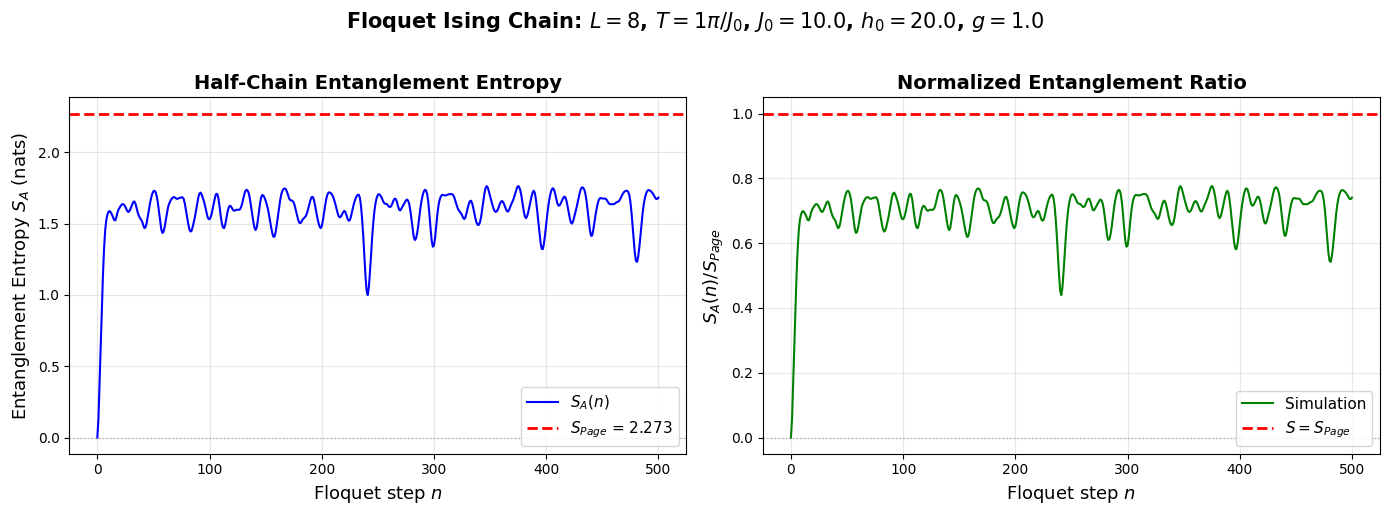


ENTANGLEMENT DYNAMICS SUMMARY
System Parameters:
  Chain length: L = 8
  Floquet period: T = 1π/J_0 = 0.314159
  Coupling: J_0 = 10.0
  Field: h_0 = 20.0
  Perturbation: g = 1.0

Entanglement Evolution:
  Initial entropy: S(0) = -0.000000 nats (-0.0000 × S_Page)
  Final entropy: S(n=500) = 1.683058 nats (0.7406 × S_Page)
  Page value: S_Page = 2.272589 nats
  Maximum ratio: 0.7763
  Steps to reach 90% of S_Page: Not reached


Entanglement Growth Summary:
S(n=0) = -0.000000 (-0.0000 × S_Page)
S(n=500) = 1.683058 (0.7406 × S_Page)
S_Page = 2.272589


In [ ]:
# ============================================
# PART 7: PLOTTING ENTANGLEMENT DYNAMICS
# ============================================

def plot_entanglement_dynamics(steps, S_avg, S_Page, L, J_0, h_0, g, n_period):
    """
    Plot the entanglement entropy vs Floquet steps.

    Parameters:
    -----------
    steps : ndarray
        Floquet step indices
    S_avg : ndarray
        Averaged entanglement entropy
    S_Page : float
        Page value
    L : int
        System size
    J_0 : float
        Ising coupling strength
    h_0 : float
        Longitudinal field strength
    g : float
        Transverse field strength
    n_period : int
        Integer n in T = n*π/J_0
    """
    # Compute the ratio
    S_ratio = S_avg / S_Page

    # Create the plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # Left plot: Entropy S(n)
    ax1.plot(steps, S_avg, linestyle='-', linewidth=1.5, color='blue', label=r'$S_A(n)$')
    ax1.axhline(S_Page, color='red', linestyle='--', linewidth=2,
                label=f'$S_{{Page}}$ = {S_Page:.3f}')
    ax1.axhline(0, color='gray', linestyle=':', linewidth=1, alpha=0.5)
    ax1.set_xlabel("Floquet step $n$", fontsize=13)
    ax1.set_ylabel("Entanglement Entropy $S_A$ (nats)", fontsize=13)
    ax1.set_title("Half-Chain Entanglement Entropy", fontsize=14, fontweight='bold')
    ax1.legend(fontsize=11, loc='lower right')
    ax1.grid(True, alpha=0.3)

    # Right plot: Ratio S(n) / S_Page
    ax2.plot(steps, S_ratio, linestyle='-', linewidth=1.5, color='green', label='Simulation')
    ax2.axhline(1.0, color='red', linestyle='--', linewidth=2, label='$S = S_{Page}$')
    ax2.axhline(0, color='gray', linestyle=':', linewidth=1, alpha=0.5)
    ax2.set_xlabel("Floquet step $n$", fontsize=13)
    ax2.set_ylabel(r"$S_A(n) / S_{Page}$", fontsize=13)
    ax2.set_title("Normalized Entanglement Ratio", fontsize=14, fontweight='bold')
    ax2.legend(fontsize=11, loc='lower right')
    ax2.grid(True, alpha=0.3)

    # Overall title with parameters (T = n*π/J_0 format)
    fig.suptitle(f"Floquet Ising Chain: $L={L}$, $T={n_period}\\pi/J_0$, " +
                 f"$J_0={J_0}$, $h_0={h_0}$, $g={g}$",
                 fontsize=15, fontweight='bold', y=1.02)

    plt.tight_layout()
    plt.show()

    # Print detailed summary
    print("\n" + "="*70)
    print("ENTANGLEMENT DYNAMICS SUMMARY")
    print("="*70)
    print(f"System Parameters:")
    print(f"  Chain length: L = {L}")
    print(f"  Floquet period: T = {n_period}π/J_0 = {n_period * np.pi / J_0:.6f}")
    print(f"  Coupling: J_0 = {J_0}")
    print(f"  Field: h_0 = {h_0}")
    print(f"  Perturbation: g = {g}")
    print(f"\nEntanglement Evolution:")
    print(f"  Initial entropy: S(0) = {S_avg[0]:.6f} nats ({S_ratio[0]:.4f} × S_Page)")
    print(f"  Final entropy: S(n={len(steps)-1}) = {S_avg[-1]:.6f} nats ({S_ratio[-1]:.4f} × S_Page)")
    print(f"  Page value: S_Page = {S_Page:.6f} nats")
    print(f"  Maximum ratio: {np.max(S_ratio):.4f}")
    print(f"  Steps to reach 90% of S_Page: ", end="")

    # Find step to reach 0.9 * S_Page
    idx_90 = np.where(S_ratio >= 0.9)[0]
    if len(idx_90) > 0:
        print(f"n ≈ {steps[idx_90[0]]}")
    else:
        print("Not reached")

    print("="*70 + "\n")
# ============================================
# PLOT RESULTS
# ============================================

print("\n" + "="*60)
print("PLOTTING RESULTS")
print("="*60)

# Plot the results
plot_entanglement_dynamics(
    steps, S_avg, S_Page,
    L_sim, J_0_sim, h_0_sim, g_sim, n_period_sim
)

print("\n" + "="*60)
print("Entanglement Growth Summary:")
print("="*60)
print(f"S(n=0) = {S_avg[0]:.6f} ({S_avg[0]/S_Page:.4f} × S_Page)")
print(f"S(n={n_floquet_steps}) = {S_avg[-1]:.6f} ({S_avg[-1]/S_Page:.4f} × S_Page)")
print(f"S_Page = {S_Page:.6f}")
print("="*60)

# Prethermal Hilbert space fragmentation analysis

We move towards showing that the violation of ETH is due to Hilbert space fragmentation. We show this by showing that the entanglement entropy of an initial state belonging to the largest fragment saturates to the page value of the largest fragment.

References:


1.   Somsubhra Ghosh, Indranil Paul, and K. Sengupta, "Prethermal Fragmentation in a Periodically Driven Fermionic Chain," Phys. Rev. Lett. 130, 120401 (2023). doi: [10.1103/PhysRevLett.130.120401](https://doi.org/10.1103/PhysRevLett.130.120401).
2.   Pablo Sala et al., "Ergodicity Breaking Arising from Hilbert Space Fragmentation in Dipole-Conserving Hamiltonians," Phys. Rev. X 10, 011047 (2020). doi: [10.1103/PhysRevX.10.011047](https://doi.org/10.1103/PhysRevX.10.011047).

The fragmentation is prethermal because we are analysing only the first-order Floquet hamiltonian using Floquet perturbation theory.

Reference:

Arnab Sen, Diptiman Sen, and K. Sengupta, "Analytic approaches to periodically driven closed quantum systems: methods and applications," J. Phys.: Condens. Matter 33, 443003 (2021). doi: [10.1088/1361-648X/ac1b61](https://doi.org/10.1088/1361-648X/ac1b61).






## Floquet Hamiltonian and different fragments


The first-order Floquet Hamiltonian at the fragmentation driving time periods becomes:

$$
\boxed{\;
(H_F^{(1)})_{nm}
=-\langle n|g\sum_{i=1}^{L}\sigma_i^x|m\rangle\,\delta_{P_{nm},0},
\;}
$$

where, $P_{nm}$ is the difference between the operator $\mathcal{O}:=J_0\sum_{i=1}^{L}\sigma_i^z\sigma_{i+1}^z+2 J_0\sum_{i=1}^L\sigma_i^z$ eigenvalues in the nth and mth states in the Fock site basis.  

## Building the $\mathcal{O}$ operator for periodic boundary conditions:

$$\mathcal{O}:=J_0\sum_{i=1}^{L}\sigma_i^z\sigma_{i+1}^z+2 J_0\sum_{i=1}^L\sigma_i^z$$



In [ ]:
# ============================================================
# PART 8: FRAGMENT ANALYSIS - OPERATOR O CONSTRUCTION (PBC)
# ============================================================

from quspin.operators import hamiltonian as quspin_hamiltonian
from collections import deque

def build_O_operator(L, J0):
    """
    Build the diagonal operator O = J0 * Σ σ^z_i σ^z_{i+1} + 2*J0 * Σ σ^z_i

    This is for PERIODIC boundary conditions (L ZZ bonds, including wrap-around).

    Parameters:
    -----------
    L : int
        Number of sites
    J0 : float
        Coupling constant

    Returns:
    --------
    O_diag : ndarray, shape (2**L,)
        Diagonal elements O_n = <n|O|n> indexed by state integer
    """
    # Build basis
    basis = spin_basis_1d(L, pauli=1)

    # ZZ interaction (periodic BC: L bonds, including wrap-around)
    # i+1 is taken mod L, so site L-1 connects to site 0
    zz_list = [[J0, i, (i + 1) % L] for i in range(L)]

    # Z field: 2*J0 * σ^z_i
    z_list = [[2.0 * J0, i] for i in range(L)]

    static = [["zz", zz_list], ["z", z_list]]

    O = quspin_hamiltonian(static, [], basis=basis, dtype=np.float64,
                           check_symm=False, check_herm=False)

    O_diag = np.array(O.diagonal())

    return O_diag


# ============================================
# TEST: Build O operator
# ============================================

print("\n" + "="*60)
print("PART 8: Building Operator O for Fragment Identification (PBC)")
print("="*60)

# Parameters for fragmentation analysis
L_frag = 8       # System size
J0_frag = 10.0   # Coupling for O operator

print(f"\nParameters: L = {L_frag}, J0 = {J0_frag}")
print(f"Boundary conditions: PERIODIC (L = {L_frag} ZZ bonds)")

# Build O diagonal
O_diag = build_O_operator(L_frag, J0_frag)
Ns = 2**L_frag

print(f"O_diag shape: {O_diag.shape}")
print(f"Hilbert space dimension: Ns = {Ns}")

# Verify with manual calculation for a few states
# QuSpin convention: bit=0 → UP (σ^z=+1), bit=1 → DOWN (σ^z=-1)
#
# For PERIODIC BC with L sites:
#   - L ZZ bonds (including wrap-around from site L-1 to site 0)
#
# State 0 (all bits=0) = all UP:
#   ZZ terms: (+1)*(+1) = +1 for each bond, L bonds → L*J0
#   Z terms: 2*J0*(+1)*L = 2*L*J0
#   Total: L*J0 + 2*L*J0 = 3*L*J0
#
# State 255 (all bits=1) = all DOWN:
#   ZZ terms: (-1)*(-1) = +1 for each bond, L bonds → L*J0
#   Z terms: 2*J0*(-1)*L = -2*L*J0
#   Total: L*J0 - 2*L*J0 = -L*J0

expected_all_up = 3 * L_frag * J0_frag      # = 3*8*10 = 240
expected_all_down = -L_frag * J0_frag       # = -8*10 = -80

print(f"\nVerification (PBC):")
print(f"  O_diag[0] = {O_diag[0]:.1f} (all UP, expected: {expected_all_up})")
print(f"  O_diag[255] = {O_diag[255]:.1f} (all DOWN, expected: {expected_all_down})")

assert np.isclose(O_diag[0], expected_all_up), f"O_diag[0] verification failed: got {O_diag[0]}, expected {expected_all_up}"
assert np.isclose(O_diag[255], expected_all_down), f"O_diag[255] verification failed: got {O_diag[255]}, expected {expected_all_down}"
print("  ✓ Verification passed!")

print("\n" + "="*60)
print("Part 8 complete: O operator built successfully (PBC)")
print("="*60)


PART 8: Building Operator O for Fragment Identification (PBC)

Parameters: L = 8, J0 = 10.0
Boundary conditions: PERIODIC (L = 8 ZZ bonds)
O_diag shape: (256,)
Hilbert space dimension: Ns = 256

Verification (PBC):
  O_diag[0] = 240.0 (all UP, expected: 240.0)
  O_diag[255] = -80.0 (all DOWN, expected: -80.0)
  ✓ Verification passed!

Part 8 complete: O operator built successfully (PBC)


## Connectivity graph and largest fragment:




In [ ]:
# ============================================================
# PART 9: CONNECTIVITY GRAPH AND FRAGMENT IDENTIFICATION
#         WITH ↑↑ BOND ANALYSIS
# ============================================================

def build_connectivity_graph(L, O_diag, tol=1e-10):
    """
    Build the connectivity graph for Hilbert space fragmentation.

    Edge (n, m) exists if:
      1. States n and m differ by exactly one spin flip
      2. |O_n - O_m| < tol (resonance condition P_nm = 0)

    Parameters:
    -----------
    L : int
        Number of sites
    O_diag : ndarray
        Diagonal elements of O operator
    tol : float
        Tolerance for resonance condition

    Returns:
    --------
    adjacency : list of lists
        adjacency[n] = list of neighbors of state n
    num_edges : int
        Total number of edges
    """
    Ns = 2**L
    adjacency = [[] for _ in range(Ns)]
    num_edges = 0

    for n in range(Ns):
        O_n = O_diag[n]

        # Find single-flip neighbors (flip each bit)
        for i in range(L):
            m = n ^ (1 << i)  # Flip bit i

            if m > n:  # Count each edge once
                O_m = O_diag[m]
                P_nm = O_n - O_m

                if abs(P_nm) < tol:
                    adjacency[n].append(m)
                    adjacency[m].append(n)
                    num_edges += 1

    return adjacency, num_edges


def find_connected_components(adjacency):
    """
    Find connected components using BFS.

    Parameters:
    -----------
    adjacency : list of lists
        Adjacency list representation of graph

    Returns:
    --------
    components : list of lists
        Each element is a list of state indices in that fragment
    """
    Ns = len(adjacency)
    visited = [False] * Ns
    components = []

    for start in range(Ns):
        if not visited[start]:
            # BFS from this node
            component = []
            queue = deque([start])
            visited[start] = True

            while queue:
                node = queue.popleft()
                component.append(node)

                for neighbor in adjacency[node]:
                    if not visited[neighbor]:
                        visited[neighbor] = True
                        queue.append(neighbor)

            components.append(sorted(component))

    return components


def get_fragment_statistics(components):
    """
    Compute statistics about the fragments.
    """
    sizes = [len(c) for c in components]

    stats = {
        'num_fragments': len(components),
        'sizes': sorted(sizes),
        'max_size': max(sizes),
        'min_size': min(sizes),
        'num_singletons': sum(1 for s in sizes if s == 1)
    }

    # Size distribution
    size_counts = {}
    for s in sizes:
        size_counts[s] = size_counts.get(s, 0) + 1
    stats['size_counts'] = size_counts

    return stats


def find_largest_fragment(components):
    """
    Return the largest fragment (list of state indices).
    """
    return max(components, key=len)


def get_spin_config(state_idx, L):
    """
    Get spin configuration string for a state.
    QuSpin convention: bit=0 → UP (↑), bit=1 → DOWN (↓)
    """
    spins = []
    for i in range(L):
        bit = (state_idx >> i) & 1
        spins.append('↓' if bit else '↑')
    return ''.join(spins)


# ============================================================
# STEP 1: Helper functions for ↑↑ bonds and N_defect
# ============================================================

def get_spin_array(state_idx, L):
    """
    Convert state index n into an array S[i] = ±1 with the same convention
    as get_spin_config: bit=0 -> up (+1), bit=1 -> down (-1).
    """
    S = np.empty(L, dtype=int)
    for i in range(L):
        bit = (state_idx >> i) & 1
        S[i] = +1 if bit == 0 else -1
    return S


def get_upup_bond_pattern(state_idx, L):
    """
    Return a length-L integer array p where
        p[i] = 1 if bond (i, i+1 mod L) is ↑↑
             = 0 otherwise,
    using periodic boundary conditions.
    """
    S = get_spin_array(state_idx, L)
    p = np.zeros(L, dtype=int)
    for i in range(L):
        j = (i + 1) % L
        # ↑↑ means S[i] = +1 and S[j] = +1
        if S[i] == +1 and S[j] == +1:
            p[i] = 1
    return p


def get_N_defect(state_idx, L):
    """
    Number of ↑↑ bonds in the configuration.
    """
    p = get_upup_bond_pattern(state_idx, L)
    return int(p.sum())


def bond_pattern_to_string(p):
    """
    Convert an integer array p[i] in {0,1} to a string '0101...'.
    """
    return ''.join(str(x) for x in p)


# ============================================================
# STEP 3: Extended display functions with N_defect and bond pattern
# ============================================================

def display_fragment_states(fragment_states, L, O_diag, adjacency,
                            N_defect_all=None, bond_patterns_all=None):
    """
    Display detailed information about states in a fragment.

    Parameters:
    -----------
    fragment_states : list
        List of state indices in the fragment
    L : int
        Number of sites
    O_diag : ndarray
        Diagonal of O operator
    adjacency : list of lists
        Adjacency list for connectivity
    N_defect_all : ndarray, optional
        Array of N_defect values for all states
    bond_patterns_all : list, optional
        List of bond pattern arrays for all states
    """
    print(f"  {'#':<4} {'Index':<8} {'Binary':<{L+2}} {'Spins':<{L+2}} "
          f"{'O value':<12} {'N_def':<6} {'Bonds(↑↑)':<{L+2}} {'Neighbors'}")
    print("  " + "-"*(55 + 3*L))

    for i, state_idx in enumerate(fragment_states):
        binary_str = format(state_idx, f'0{L}b')
        spin_str = get_spin_config(state_idx, L)
        O_val = O_diag[state_idx]

        N_def = N_defect_all[state_idx] if N_defect_all is not None else 0
        if bond_patterns_all is not None:
            p = bond_patterns_all[state_idx]
            if isinstance(p, np.ndarray):
                bond_str = bond_pattern_to_string(p)
            else:
                bond_str = str(p)
        else:
            bond_str = ""

        # Get neighbors within fragment
        neighbors_in_frag = [m for m in adjacency[state_idx] if m in fragment_states]
        neighbors_str = str(neighbors_in_frag) if neighbors_in_frag else "[]"

        print(f"  {i+1:<4} {state_idx:<8} {binary_str:<{L+2}} {spin_str:<{L+2}} "
              f"{O_val:<12.2f} {N_def:<6} {bond_str:<{L+2}} {neighbors_str}")


def display_all_fragments(components, L, O_diag, adjacency,
                          N_defect_all=None, bond_patterns_all=None,
                          sort_by_size=True, show_singletons=True, max_display=None):
    """
    Display detailed information about ALL fragments.

    Parameters:
    -----------
    components : list of lists
        List of fragments (each fragment is a list of state indices)
    L : int
        Number of sites
    O_diag : ndarray
        Diagonal of O operator
    adjacency : list of lists
        Adjacency list for connectivity
    N_defect_all : ndarray, optional
        Array of N_defect values for all states
    bond_patterns_all : list, optional
        List of bond pattern arrays for all states
    sort_by_size : bool
        If True, sort fragments by size (largest first)
    show_singletons : bool
        If True, show singleton fragments (size=1)
    max_display : int or None
        Maximum number of fragments to display (None = all)
    """
    # Sort fragments by size if requested
    if sort_by_size:
        sorted_components = sorted(components, key=len, reverse=True)
    else:
        sorted_components = components

    # Filter singletons if requested
    if not show_singletons:
        sorted_components = [c for c in sorted_components if len(c) > 1]

    # Limit display if requested
    if max_display is not None:
        sorted_components = sorted_components[:max_display]

    total_fragments = len(components)
    displayed_fragments = len(sorted_components)

    print(f"\n{'='*90}")
    print(f"DETAILED FRAGMENT DATA (Showing {displayed_fragments} of {total_fragments} fragments)")
    print(f"{'='*90}")

    for frag_idx, fragment in enumerate(sorted_components):
        D = len(fragment)
        O_val = O_diag[fragment[0]]

        # Count internal edges
        internal_edges = sum(len([m for m in adjacency[s] if m in fragment])
                             for s in fragment) // 2

        # Get N_defect info for this fragment
        if N_defect_all is not None:
            N_vals = set(N_defect_all[s] for s in fragment)
            N_def_str = f", N_defect = {N_vals}"
        else:
            N_def_str = ""

        print(f"\n{'─'*90}")
        print(f"FRAGMENT {frag_idx + 1}: D = {D} states, O = {O_val:.2f}, "
              f"Internal edges = {internal_edges}{N_def_str}")
        print(f"{'─'*90}")

        display_fragment_states(fragment, L, O_diag, adjacency,
                                N_defect_all, bond_patterns_all)

    print(f"\n{'='*90}")
    print(f"End of fragment data")
    print(f"{'='*90}")


# ============================================================
# STEP 4: Fragment-level analysis with N_defect and bond patterns
# ============================================================

def create_fragment_summary_table(components, L, O_diag, adjacency,
                                  N_defect_all=None, bond_patterns_all=None):
    """
    Create a summary table of all fragments with N_defect and bond pattern analysis.

    Parameters:
    -----------
    components : list of lists
        List of fragments
    L : int
        Number of sites
    O_diag : ndarray
        Diagonal of O operator
    adjacency : list of lists
        Adjacency list for connectivity
    N_defect_all : ndarray, optional
        Array of N_defect values for all states
    bond_patterns_all : list, optional
        List of bond pattern arrays for all states

    Returns:
    --------
    summary : list of dict
        List of dictionaries with fragment summary info
    """
    summary = []

    for frag_idx, fragment in enumerate(components):
        D = len(fragment)
        O_val = O_diag[fragment[0]]

        # Count internal edges
        internal_edges = sum(len([m for m in adjacency[s] if m in fragment])
                             for s in fragment) // 2

        # N_defect consistency check
        if N_defect_all is not None:
            N_vals = [N_defect_all[s] for s in fragment]
            N_def_unique = sorted(set(N_vals))
        else:
            N_def_unique = []

        # Bond pattern consistency check
        if bond_patterns_all is not None:
            # Convert to strings for easy comparison
            patterns = [bond_pattern_to_string(bond_patterns_all[s])
                        for s in fragment]
            patterns_unique = sorted(set(patterns))
        else:
            patterns_unique = []

        summary.append({
            'fragment_id': frag_idx + 1,
            'size': D,
            'O_value': O_val,
            'internal_edges': internal_edges,
            'states': fragment,
            'N_defect_values': N_def_unique,
            'bond_patterns': patterns_unique,
        })

    # Sort by size (descending)
    summary.sort(key=lambda x: x['size'], reverse=True)

    return summary


def print_fragment_summary_table(summary, L):
    """
    Print a compact summary table of all fragments with N_defect and bond pattern info.
    """
    print(f"\n{'='*110}")
    print("FRAGMENT SUMMARY TABLE (with ↑↑ bond analysis)")
    print(f"{'='*110}")
    print(f"{'ID':<6} {'Size':<8} {'O value':<12} {'Edges':<8} "
          f"{'#N_def':<8} {'#patterns':<12} {'N_def':<8} {'Example pattern':<{L+2}}")
    print(f"{'-'*110}")

    for frag in summary:
        N_list = frag.get('N_defect_values', [])
        pat_list = frag.get('bond_patterns', [])
        num_N = len(N_list)
        num_pat = len(pat_list)
        example_pat = pat_list[0] if pat_list else ''
        example_N = str(N_list[0]) if N_list else ''

        print(f"{frag['fragment_id']:<6} {frag['size']:<8} {frag['O_value']:<12.2f} "
              f"{frag['internal_edges']:<8} {num_N:<8} {num_pat:<12} "
              f"{example_N:<8} {example_pat:<{L+2}}")

    print(f"{'='*110}")


# ============================================================
# STEP 6: Fibonacci check helper
# ============================================================

def fib(n):
    """
    Compute the n-th Fibonacci number (F_0 = 0, F_1 = 1, F_2 = 1, ...).
    """
    a, b = 0, 1
    for _ in range(n):
        a, b = b, a + b
    return a


# ============================================
# TEST: Build connectivity graph and find fragments
# ============================================

print("\n" + "="*60)
print("PART 9: Building Connectivity Graph and Finding Fragments")
print("        (with ↑↑ bond analysis)")
print("="*60)

tol = 1e-10
print(f"\nParameters: L = {L_frag}, J0 = {J0_frag}, tol = {tol}")

# ============================================
# STEP 2: Precompute N_defect and bond patterns for all states
# ============================================

print("\nPrecomputing N_defect and ↑↑ bond patterns for all states...")
N_defect_all = np.zeros(Ns, dtype=int)
bond_patterns_all = [None] * Ns

for n in range(Ns):
    p = get_upup_bond_pattern(n, L_frag)
    bond_patterns_all[n] = p
    N_defect_all[n] = int(p.sum())

print(f"  N_defect range: {N_defect_all.min()} to {N_defect_all.max()}")
print(f"  N_defect distribution:")
for n_val in range(N_defect_all.max() + 1):
    count = np.sum(N_defect_all == n_val)
    if count > 0:
        print(f"    N_defect = {n_val}: {count} states")

# Build connectivity graph
print("\nBuilding connectivity graph...")
adjacency, num_edges = build_connectivity_graph(L_frag, O_diag, tol)

total_possible_edges = Ns * L_frag // 2
print(f"  Number of edges: {num_edges}")
print(f"  Total possible edges (all single-flips): {total_possible_edges}")
print(f"  Fraction kept: {num_edges / total_possible_edges:.4f}")

# Find connected components
print("\nFinding connected components...")
components = find_connected_components(adjacency)
stats = get_fragment_statistics(components)

print(f"\n  Number of fragments: {stats['num_fragments']}")
print(f"  Largest fragment size: {stats['max_size']}")
print(f"  Number of singletons: {stats['num_singletons']}")

# Size distribution
print("\n  Size distribution:")
print(f"    {'Size':<8} {'Count':<8} {'Total':<8}")
print("    " + "-"*24)
for size in sorted(stats['size_counts'].keys()):
    count = stats['size_counts'][size]
    print(f"    {size:<8} {count:<8} {size*count:<8}")

# Get largest fragment
largest_fragment = find_largest_fragment(components)
D_largest = len(largest_fragment)

print(f"\n  Largest fragment has D = {D_largest} states")
print(f"  O value in largest fragment: {O_diag[largest_fragment[0]]:.1f}")

# Verify total
total_states = sum(len(c) for c in components)
assert total_states == Ns, f"Total states mismatch: {total_states} != {Ns}"
print(f"\n  Total states across all fragments: {total_states} = Ns ✓")

# ============================================
# Display summary table for all fragments (with ↑↑ bond analysis)
# ============================================
fragment_summary = create_fragment_summary_table(
    components, L_frag, O_diag, adjacency,
    N_defect_all, bond_patterns_all
)
print_fragment_summary_table(fragment_summary, L_frag)

# ============================================
# STEP 5: Sanity checks and diagnostics
# ============================================

print("\n" + "="*70)
print("↑↑ BOND PATTERN ANALYSIS")
print("="*70)

# Count fragments with exactly one frozen bond pattern
num_single_pattern = sum(1 for frag in fragment_summary
                         if len(frag['bond_patterns']) == 1)
print(f"\nFragments with a single frozen ↑↑-bond pattern: "
      f"{num_single_pattern}/{len(fragment_summary)}")

# Count fragments with exactly one N_defect value
num_single_N = sum(1 for frag in fragment_summary
                   if len(frag['N_defect_values']) == 1)
print(f"Fragments with a single N_defect value: "
      f"{num_single_N}/{len(fragment_summary)}")

# Largest fragment details
largest = fragment_summary[0]
print("\nLargest fragment details:")
print(f"  ID: {largest['fragment_id']}")
print(f"  Size: {largest['size']}")
print(f"  O value: {largest['O_value']:.2f}")
print(f"  N_defect values: {largest['N_defect_values']}")
print(f"  Bond patterns: {largest['bond_patterns']}")
print(f"  Number of distinct patterns: {len(largest['bond_patterns'])}")

# Verify largest fragment has no ↑↑ bonds
if largest['N_defect_values'] == [0]:
    print("  ✓ Largest fragment has N_defect = 0 (no ↑↑ bonds)")
else:
    print(f"  ⚠ Largest fragment has N_defect = {largest['N_defect_values']}")

if largest['bond_patterns'] == ['0' * L_frag]:
    print(f"  ✓ Bond pattern is all zeros: {'0' * L_frag}")

# ============================================
# STEP 6: Fibonacci check for largest fragment
# ============================================

print("\n" + "-"*70)
print("Fibonacci consistency check (no adjacent ↑ on ring):")
print("-"*70)

# For a ring of L sites, the number of binary strings with no two adjacent 1s is:
# F_{L-1} + F_{L+1} (Lucas numbers related)
dim_no_adj_ring = fib(L_frag - 1) + fib(L_frag + 1)
print(f"  L = {L_frag}")
print(f"  F_{L_frag-1} = {fib(L_frag - 1)}")
print(f"  F_{L_frag+1} = {fib(L_frag + 1)}")
print(f"  Predicted dimension (no adjacent ↑ on ring): F_{L_frag-1} + F_{L_frag+1} = {dim_no_adj_ring}")
print(f"  Largest fragment size: {D_largest}")

if D_largest == dim_no_adj_ring:
    print(f"  ✓ Matches! Largest fragment = configurations with no ↑↑ bonds")
else:
    print(f"  ⚠ Mismatch: {D_largest} ≠ {dim_no_adj_ring}")

# ============================================
# Display detailed data for ALL non-singleton fragments
# ============================================
display_all_fragments(
    components,
    L_frag,
    O_diag,
    adjacency,
    N_defect_all,
    bond_patterns_all,
    sort_by_size=True,      # Show largest fragments first
    show_singletons=False,  # Skip singletons (size=1) for cleaner output
    max_display=None        # Show all non-singleton fragments
)

# ============================================
# OPTIONAL: Display singletons separately (with N_defect info)
# ============================================
singleton_count = stats['num_singletons']
if singleton_count > 0:
    print(f"\n{'='*80}")
    print(f"SINGLETON FRAGMENTS (Size = 1): {singleton_count} total")
    print(f"{'='*80}")
    print(f"  {'Index':<8} {'Binary':<{L_frag+2}} {'Spins':<{L_frag+2}} "
          f"{'O value':<12} {'N_def':<6} {'Bonds(↑↑)'}")
    print("  " + "-"*(50 + 3*L_frag))

    singletons = [c[0] for c in components if len(c) == 1]
    singletons.sort()  # Sort by state index

    for state_idx in singletons:
        binary_str = format(state_idx, f'0{L_frag}b')
        spin_str = get_spin_config(state_idx, L_frag)
        O_val = O_diag[state_idx]
        N_def = N_defect_all[state_idx]
        bond_str = bond_pattern_to_string(bond_patterns_all[state_idx])
        print(f"  {state_idx:<8} {binary_str:<{L_frag+2}} {spin_str:<{L_frag+2}} "
              f"{O_val:<12.2f} {N_def:<6} {bond_str}")

print("\n" + "="*60)
print("Part 9 complete: Fragments identified successfully")
print("              (with ↑↑ bond conservation analysis)")
print("="*60)


PART 9: Building Connectivity Graph and Finding Fragments
        (with ↑↑ bond analysis)

Parameters: L = 8, J0 = 10.0, tol = 1e-10

Precomputing N_defect and ↑↑ bond patterns for all states...
  N_defect range: 0 to 8
  N_defect distribution:
    N_defect = 0: 47 states
    N_defect = 1: 64 states
    N_defect = 2: 60 states
    N_defect = 3: 40 states
    N_defect = 4: 28 states
    N_defect = 5: 8 states
    N_defect = 6: 8 states
    N_defect = 8: 1 states

Building connectivity graph...
  Number of edges: 256
  Total possible edges (all single-flips): 1024
  Fraction kept: 0.2500

Finding connected components...

  Number of fragments: 90
  Largest fragment size: 47
  Number of singletons: 49

  Size distribution:
    Size     Count    Total   
    ------------------------
    1        49       49      
    2        16       32      
    3        8        24      
    5        8        40      
    8        8        64      
    47       1        47      

  Largest fragment has

## Fragment Page value by Monte Carlo sampling:
What Page actually did
Take a bipartite Hilbert space
$$
\mathcal H = \mathcal H_A \otimes \mathcal H_B, \quad
\dim \mathcal H_A = m \le \dim \mathcal H_B = n.
$$
Choose a pure state $|\psi\rangle$ uniformly at random with respect to the Haar measure on $\mathcal H$. Let $S_A(\psi)$ be the von Neumann entropy of the reduced density matrix $\rho_A = \mathrm{Tr}_B |\psi\rangle\langle\psi|$.
Page's entropy is
$$
\boxed{
\langle S_A \rangle_{Page} := \mathbb{E}_{\psi\ Haar}[S_A(\psi)]
}
$$

Generalizing to a fragment subspace, take some subspace $\mathcal D \subset \mathcal H$ of dimension $D$. We want the fragment Page value.
We fix the bipartition $A|B$.
We put the Haar measure on $\mathcal D$ (random normalized linear combinations of an orthonormal basis of $\mathcal D$).
Then the fragment Page value is
$$
S_p^{\mathcal D} := \mathbb{E}_{\psi \in \mathcal D}[,S_A(\psi)].
$$

So in the fragmentation story:
*   Full symmetry sector: Page value $S_p^{(sector)}$.
*   Fragment subspace $\mathcal D$: Page value $S_p^{(\mathcal D)}$.


Thus,
*   If dynamics explores the whole sector ergodically:
$S_{sat} \approx S_p^{(sector)}$.
*   If dynamics is confined to a fragment and is ergodic inside that fragment:
$S_{sat} \approx S_p^{(\mathcal D)}$.




The fragment Page value formula is:

$$
S_p^{(\mathcal D)} := \mathbb{E}_{\psi \in \mathcal{D}}\bigl[S_A(\psi)\bigr].
$$



In [ ]:
# ============================================================
# PART 10: FRAGMENT PAGE VALUE VIA MONTE CARLO
# ============================================================

def sample_haar_state_in_fragment(fragment_states, Ns):
    """
    Sample a Haar-random state in the fragment subspace.

    The fragment has basis {|φ_α⟩} = computational basis states.
    A Haar-random state in this subspace is:
        |ψ⟩ = Σ_α c_α |φ_α⟩
    where c_α are normalized complex Gaussian coefficients.

    Parameters:
    -----------
    fragment_states : list
        List of basis state indices in the fragment
    Ns : int
        Full Hilbert space dimension (2**L)

    Returns:
    --------
    psi : ndarray, shape (Ns,)
        Haar-random state vector in full Hilbert space,
        with support only on fragment states
    """
    D = len(fragment_states)

    # Draw complex Gaussian coefficients (GUE ensemble)
    z = np.random.randn(D) + 1j * np.random.randn(D)

    # Normalize
    c = z / np.linalg.norm(z)

    # Build full state vector
    psi = np.zeros(Ns, dtype=np.complex128)
    for i, state_idx in enumerate(fragment_states):
        psi[state_idx] = c[i]

    return psi


def compute_fragment_page_value_MC(fragment_states, L, n_samples=1000,
                                    A_indices=None, verbose=True):
    """
    Compute the fragment Page value via Monte Carlo sampling.

    S_Page^(fragment) = E_{ψ ∈ fragment}[S_A(ψ)]

    This is the CORRECT way to compute the Page value for a fragment:
    average the entanglement entropy over Haar-random states in the
    fragment subspace.

    Parameters:
    -----------
    fragment_states : list
        List of basis state indices in the fragment
    L : int
        Number of sites
    n_samples : int
        Number of random states to sample
    A_indices : list, optional
        Subsystem A indices (default: left half-chain)
    verbose : bool
        Print progress

    Returns:
    --------
    S_page_frag : float
        Fragment Page value (mean entropy)
    S_std : float
        Standard deviation of entropy distribution
    S_sem : float
        Standard error of the mean
    """
    Ns = 2**L
    D = len(fragment_states)

    # Default: half-chain bipartition
    if A_indices is None:
        L_A = L // 2
        A_indices = list(range(L_A))

    if verbose:
        print(f"\nComputing fragment Page value via Monte Carlo...")
        print(f"  Fragment dimension: D = {D}")
        print(f"  Number of samples: {n_samples}")
        print(f"  Subsystem A: sites {A_indices}")

    # Sample entropies
    entropies = np.zeros(n_samples)

    for r in range(n_samples):
        # Sample Haar-random state in fragment
        psi = sample_haar_state_in_fragment(fragment_states, Ns)

        # Compute entanglement entropy
        S = bipartite_entropy(psi, L, A_indices)
        entropies[r] = S

        # Progress
        if verbose and (r + 1) % 200 == 0:
            print(f"    Completed {r + 1}/{n_samples} samples")

    # Compute statistics
    S_page_frag = np.mean(entropies)
    S_std = np.std(entropies, ddof=1)
    S_sem = S_std / np.sqrt(n_samples)

    if verbose:
        print(f"\n  Results:")
        print(f"    S_Page^(frag) = {S_page_frag:.6f} ± {S_sem:.6f} nats")
        print(f"    Std dev = {S_std:.6f}")
        print(f"    Min entropy in samples: {np.min(entropies):.6f}")
        print(f"    Max entropy in samples: {np.max(entropies):.6f}")

    return S_page_frag, S_std, S_sem


# ============================================
# TEST: Compute fragment Page value
# ============================================

print("\n" + "="*60)
print("PART 10: Computing Fragment Page Value via Monte Carlo")
print("="*60)

# Compute Page value for full Hilbert space (for comparison)
S_page_full = compute_page_value(L_frag)
print(f"\nFull Hilbert space Page value: S_Page = {S_page_full:.6f} nats")

# Compute Page value for largest fragment via Monte Carlo
n_MC_samples = 10000  # Number of Monte Carlo samples

S_page_frag, S_std_frag, S_sem_frag = compute_fragment_page_value_MC(
    largest_fragment,
    L_frag,
    n_samples=n_MC_samples,
    verbose=True
)

# Summary comparison
print("\n" + "-"*40)
print("COMPARISON:")
print("-"*40)
print(f"  Full Hilbert space (Ns = {Ns}):")
print(f"    S_Page = {S_page_full:.6f} nats")
print(f"\n  Largest fragment (D = {D_largest}):")
print(f"    S_Page^(frag) = {S_page_frag:.6f} ± {S_sem_frag:.6f} nats")
print(f"\n  Ratio: S_Page^(frag) / S_Page = {S_page_frag / S_page_full:.4f}")

# Theoretical bounds
d_A = 2**(L_frag // 2)
max_possible = np.log(min(D_largest, d_A))
print(f"\n  Theoretical upper bound: ln(min(D, d_A)) = ln({min(D_largest, d_A)}) = {max_possible:.6f}")

print("\n" + "="*60)
print("Part 10 complete: Fragment Page value computed")
print("="*60)


PART 10: Computing Fragment Page Value via Monte Carlo

Full Hilbert space Page value: S_Page = 2.272589 nats

Computing fragment Page value via Monte Carlo...
  Fragment dimension: D = 47
  Number of samples: 10000
  Subsystem A: sites [0, 1, 2, 3]
    Completed 200/10000 samples
    Completed 400/10000 samples
    Completed 600/10000 samples
    Completed 800/10000 samples
    Completed 1000/10000 samples
    Completed 1200/10000 samples
    Completed 1400/10000 samples
    Completed 1600/10000 samples
    Completed 1800/10000 samples
    Completed 2000/10000 samples
    Completed 2200/10000 samples
    Completed 2400/10000 samples
    Completed 2600/10000 samples
    Completed 2800/10000 samples
    Completed 3000/10000 samples
    Completed 3200/10000 samples
    Completed 3400/10000 samples
    Completed 3600/10000 samples
    Completed 3800/10000 samples
    Completed 4000/10000 samples
    Completed 4200/10000 samples
    Completed 4400/10000 samples
    Completed 4600/10000 sa

## Random state in the largest fragment

We cannot take a Haar single qubit states and tensor product them to get a pure state in the largest fragment because  we obtain these fragments for a fixed basis. Thus, we instead just choose a random state in the largest fragment and see it evolve.

In [ ]:
# ============================================================
# PART 11: ENTANGLEMENT DYNAMICS FROM RANDOM FRAGMENT BASIS STATE
# ============================================================

def build_random_basis_state_in_fragment(fragment_states, L):
    """
    Pick a random computational basis state from the fragment.

    Computational basis states are product states: |n⟩ = |s_1⟩⊗|s_2⟩⊗...⊗|s_L⟩
    Therefore they have ZERO entanglement entropy.

    Parameters:
    -----------
    fragment_states : list
        List of basis state indices in the fragment
    L : int
        Number of sites

    Returns:
    --------
    psi : ndarray, shape (2**L,)
        Random basis state from the fragment (product state, S=0)
    state_idx : int
        Index of the chosen basis state
    """
    Ns = 2**L

    # Randomly pick one basis state from the fragment
    state_idx = np.random.choice(fragment_states)

    # Build the state vector
    psi = np.zeros(Ns, dtype=np.complex128)
    psi[state_idx] = 1.0

    return psi, state_idx

psi, state_idx = build_random_basis_state_in_fragment(largest_fragment, L)
print(f"  Initial state: |{state_idx}⟩ = |{format(state_idx, f'0{L}b')}⟩")


  Initial state: |222⟩ = |11011110⟩


## Computing the results

In [ ]:
def compute_entanglement_dynamics_fragment_basis(U_F, fragment_states, L, n_periods,
                                                  n_initial_states=10,
                                                  A_indices=None, verbose=True):
    """
    Compute time evolution of entanglement entropy starting from random
    computational basis states within the fragment.

    These are product states with initial entropy S(0) = 0.

    Parameters:
    -----------
    U_F : ndarray, shape (2**L, 2**L)
        Floquet unitary operator
    fragment_states : list
        List of basis state indices in the fragment
    L : int
        Number of sites
    n_periods : int
        Number of periods to evolve
    n_initial_states : int
        Number of random basis states to average over
    A_indices : list, optional
        Subsystem A indices (default: left half-chain)
    verbose : bool
        Print progress

    Returns:
    --------
    steps : ndarray
        Time step indices (0, 1, 2, ..., n_periods)
    S_avg : ndarray
        Averaged entanglement entropy at each time step
    """
    Ns = 2**L
    D_frag = len(fragment_states)

    if A_indices is None:
        L_A = L // 2
        A_indices = list(range(L_A))

    S_avg = np.zeros(n_periods + 1)

    if verbose:
        print(f"  Evolving {n_initial_states} random basis states from fragment...")
        print(f"  Fragment size: D = {D_frag}")
        print(f"  Subsystem A: sites {A_indices}")

    for sample in range(n_initial_states):
        # Generate random basis state from fragment (product state, S=0)
        psi, state_idx = build_random_basis_state_in_fragment(fragment_states, L)

        if sample == 0 and verbose:
            S_init = bipartite_entropy(psi, L, A_indices)
            print(f"  Initial state: |{state_idx}⟩ = |{format(state_idx, f'0{L}b')}⟩")
            print(f"  Initial entropy: S(0) = {S_init:.6f} (should be 0)")

        # Time evolution
        for n in range(n_periods + 1):
            S = bipartite_entropy(psi, L, A_indices)
            S_avg[n] += S

            if n < n_periods:
                psi = U_F @ psi

        if verbose and ((sample + 1) % 5 == 0 or sample == 0):
            print(f"    Completed {sample + 1}/{n_initial_states} initial states")

    # Average over all initial states
    S_avg /= n_initial_states

    if verbose:
        print(f"\n  Final averaged entropy: S = {S_avg[-1]:.6f}")

    steps = np.arange(n_periods + 1)
    return steps, S_avg

# Number of Floquet periods
n_periods_frag = 500

# Number of random basis states to average over
n_random_states = 10

print(f"\nParameters:")
print(f"  L = {L_frag}")
print(f"  Number of time steps: {n_periods_frag}")
print(f"  Number of random fragment basis states: {n_random_states}")
print(f"  Fragment size: D = {D_largest}")
print(f"  Fragment states: {largest_fragment}")

# Run time evolution
steps_frag, S_avg_frag = compute_entanglement_dynamics_fragment_basis(
    U_floquet,
    largest_fragment,
    L_frag,
    n_periods_frag,
    n_initial_states=n_random_states,
    verbose=True
)



Parameters:
  L = 8
  Number of time steps: 500
  Number of random fragment basis states: 10
  Fragment size: D = 47
  Fragment states: [85, 87, 91, 93, 95, 107, 109, 111, 117, 119, 123, 125, 127, 170, 171, 173, 174, 175, 181, 182, 183, 186, 187, 189, 190, 191, 213, 214, 215, 218, 219, 221, 222, 223, 234, 235, 237, 238, 239, 245, 246, 247, 250, 251, 253, 254, 255]
  Evolving 10 random basis states from fragment...
  Fragment size: D = 47
  Subsystem A: sites [0, 1, 2, 3]
  Initial state: |91⟩ = |01011011⟩
  Initial entropy: S(0) = -0.000000 (should be 0)
    Completed 1/10 initial states
    Completed 5/10 initial states
    Completed 10/10 initial states

  Final averaged entropy: S = 1.426740


## Plotting the results


PART 11: Entanglement Dynamics from Random Fragment Basis States


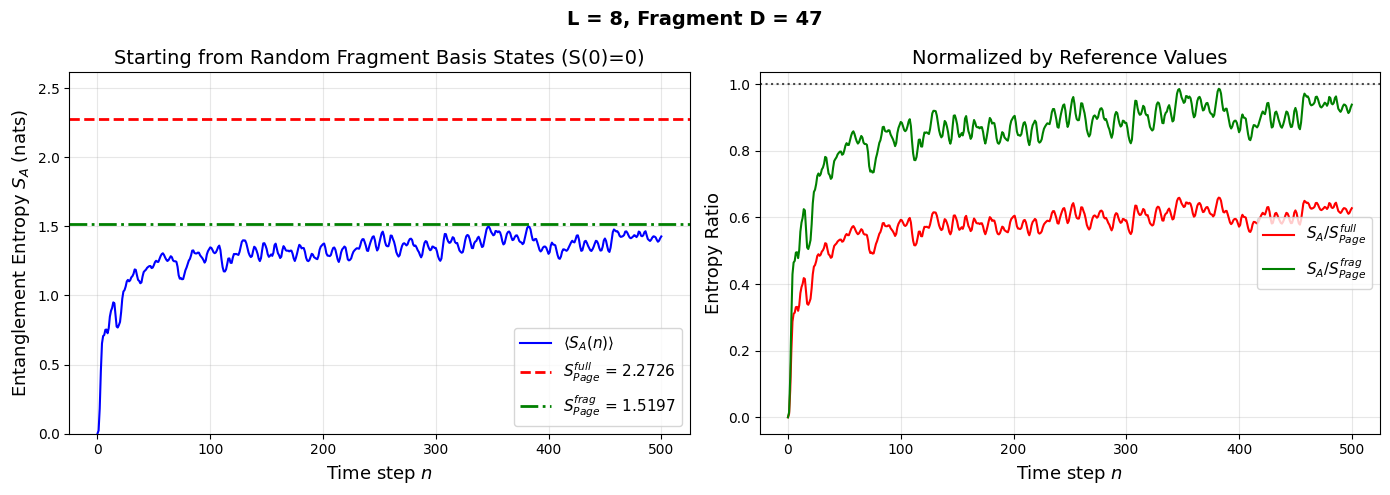


FINAL SUMMARY

System: L = 8
Initial states: 10 random basis states from fragment
Fragment size: D = 47
Fragment states: [85, 87, 91, 93, 95, 107, 109, 111, 117, 119, 123, 125, 127, 170, 171, 173, 174, 175, 181, 182, 183, 186, 187, 189, 190, 191, 213, 214, 215, 218, 219, 221, 222, 223, 234, 235, 237, 238, 239, 245, 246, 247, 250, 251, 253, 254, 255]

Reference values:
  S_Page (full, Ns=256):      2.272589 nats
  S_Page (frag, D=47):     1.519735 nats

Entropy evolution:
  S(n=0) = 0.000000 nats (should be ~0)
  S(n=500) = 1.426740 nats

Final ratios:
  S / S_Page^full = 0.6278
  S / S_Page^frag = 0.9388


In [ ]:
def plot_fragment_basis_evolution(steps, S_avg, S_page_full, S_page_frag, D_frag, L):
    """
    Plot entanglement dynamics from random fragment basis states.
    X-axis is time step n (number of Floquet periods).
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # Left: Entropy vs time step
    ax1.plot(steps, S_avg, 'b-', linewidth=1.5, label=r'$\langle S_A(n) \rangle$')
    ax1.axhline(S_page_full, color='red', linestyle='--', linewidth=2,
                label=f'$S_{{Page}}^{{full}}$ = {S_page_full:.4f}')
    ax1.axhline(S_page_frag, color='green', linestyle='-.', linewidth=2,
                label=f'$S_{{Page}}^{{frag}}$ = {S_page_frag:.4f}')

    ax1.set_xlabel('Time step $n$', fontsize=13)
    ax1.set_ylabel('Entanglement Entropy $S_A$ (nats)', fontsize=13)
    ax1.set_title('Starting from Random Fragment Basis States (S(0)=0)', fontsize=14)
    ax1.legend(fontsize=11, loc='lower right')
    ax1.grid(True, alpha=0.3)
    ax1.set_ylim(0, S_page_full * 1.15)

    # Right: Ratio to Page values
    ax2.plot(steps, S_avg / S_page_full, 'r-', linewidth=1.5,
             label=r'$S_A / S_{Page}^{full}$')
    ax2.plot(steps, S_avg / S_page_frag, 'g-', linewidth=1.5,
             label=r'$S_A / S_{Page}^{frag}$')
    ax2.axhline(1.0, color='black', linestyle=':', linewidth=1.5, alpha=0.7)

    ax2.set_xlabel('Time step $n$', fontsize=13)
    ax2.set_ylabel('Entropy Ratio', fontsize=13)
    ax2.set_title('Normalized by Reference Values', fontsize=14)
    ax2.legend(fontsize=11, loc='right')
    ax2.grid(True, alpha=0.3)

    fig.suptitle(f'L = {L}, Fragment D = {D_frag}',
                 fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()


# ============================================
# RUN: Evolution from random fragment basis states
# ============================================

print("\n" + "="*60)
print("PART 11: Entanglement Dynamics from Random Fragment Basis States")
print("="*60)



# Plot comparison
plot_fragment_basis_evolution(
    steps_frag, S_avg_frag,
    S_page_full, S_page_frag,
    D_largest, L_frag
)

# Final summary
print("\n" + "="*60)
print("FINAL SUMMARY")
print("="*60)
print(f"\nSystem: L = {L_frag}")
print(f"Initial states: {n_random_states} random basis states from fragment")
print(f"Fragment size: D = {D_largest}")
print(f"Fragment states: {largest_fragment}")
print(f"\nReference values:")
print(f"  S_Page (full, Ns={Ns}):      {S_page_full:.6f} nats")
print(f"  S_Page (frag, D={D_largest}):     {S_page_frag:.6f} nats")
print(f"\nEntropy evolution:")
print(f"  S(n=0) = {S_avg_frag[0]:.6f} nats (should be ~0)")
print(f"  S(n={n_periods_frag}) = {S_avg_frag[-1]:.6f} nats")
print(f"\nFinal ratios:")
print(f"  S / S_Page^full = {S_avg_frag[-1] / S_page_full:.4f}")
print(f"  S / S_Page^frag = {S_avg_frag[-1] / S_page_frag:.4f}")
print("="*60)

## EE vs $J_0$

### Results code

In [ ]:
# ============================================================
# PART 12: COMPARISON OF ENTANGLEMENT DYNAMICS FOR DIFFERENT J_0
# ============================================================

def run_fragment_analysis_for_J0(L, J_0, g, n_periods, n_initial_states, verbose=False):
    """
    Run complete fragment analysis for a given J_0 value.

    Parameters:
    -----------
    L : int
        Chain length
    J_0 : float
        Ising coupling strength
    g : float
        Transverse field (perturbation)
    n_periods : int
        Number of Floquet periods
    n_initial_states : int
        Number of initial states to average
    verbose : bool
        Print detailed output

    Returns:
    --------
    results : dict
        Dictionary containing steps, S_avg, S_page_full, S_page_frag, D_largest
    """
    # h_0 = 2 * J_0
    h_0 = 2.0 * J_0

    # Period T = π / J_0 (fragmentation condition)
    T = np.pi / J_0

    if verbose:
        print(f"\n{'='*60}")
        print(f"Running analysis for J_0 = {J_0}, h_0 = {h_0}, T = π/{J_0}")
        print(f"{'='*60}")

    # Step 1: Build O operator and find fragments
    O_diag = build_O_operator(L, J_0)
    adjacency, num_edges = build_connectivity_graph(L, O_diag, tol=1e-10)
    components = find_connected_components(adjacency)
    largest_fragment = find_largest_fragment(components)
    D_largest = len(largest_fragment)

    if verbose:
        print(f"  Largest fragment: D = {D_largest} states")

    # Step 2: Build Floquet operator
    ising_temp = FloquetIsingChain(L=L, J_0=J_0, h_0=h_0, g=g, TP=T, hbar=1.0)
    ising_temp.build_hamiltonians()
    U_floquet_temp = build_floquet_operator(ising_temp)

    # Step 3: Compute Page values
    S_page_full = compute_page_value(L)

    # Fragment Page value via Monte Carlo
    S_page_frag, _, _ = compute_fragment_page_value_MC(
        largest_fragment, L, n_samples=500, verbose=False
    )

    if verbose:
        print(f"  S_Page (full): {S_page_full:.4f}")
        print(f"  S_Page (frag): {S_page_frag:.4f}")

    # Step 4: Compute entanglement dynamics from fragment basis states
    Ns = 2**L
    L_A = L // 2
    A_indices = list(range(L_A))

    S_avg = np.zeros(n_periods + 1)

    for sample in range(n_initial_states):
        # Generate random basis state from fragment
        psi, _ = build_random_basis_state_in_fragment(largest_fragment, L)

        # Time evolution
        for n in range(n_periods + 1):
            S = bipartite_entropy(psi, L, A_indices)
            S_avg[n] += S

            if n < n_periods:
                psi = U_floquet_temp @ psi

    S_avg /= n_initial_states
    steps = np.arange(n_periods + 1)

    if verbose:
        print(f"  Final entropy: S = {S_avg[-1]:.4f}")
        print(f"  Ratio S/S_Page^full = {S_avg[-1]/S_page_full:.4f}")
        print(f"  Ratio S/S_Page^frag = {S_avg[-1]/S_page_frag:.4f}")

    return {
        'J_0': J_0,
        'h_0': h_0,
        'T': T,
        'steps': steps,
        'S_avg': S_avg,
        'S_page_full': S_page_full,
        'S_page_frag': S_page_frag,
        'D_largest': D_largest
    }





# ============================================
# RUN: Compare different J_0 values
# ============================================

print("\n" + "="*70)
print("PART 12: Comparing Entanglement Dynamics for Different J_0 Values")
print("="*70)

# Parameters
L_compare = 8
g_compare = 1.0
n_periods_compare = 500
n_initial_states_compare = 10

# J_0 values to compare
J_0_values = [1, 2, 3, 4, 10, 20]

print(f"\nParameters:")
print(f"  L = {L_compare}")
print(f"  g = {g_compare}")
print(f"  h_0 = 2 * J_0")
print(f"  T = π / J_0")
print(f"  Number of Floquet steps: {n_periods_compare}")
print(f"  Number of initial states: {n_initial_states_compare}")
print(f"  J_0 values: {J_0_values}")

# Run analysis for each J_0
results_list = []
for J_0 in J_0_values:
    print(f"\n--- Processing J_0 = {J_0} ---")
    result = run_fragment_analysis_for_J0(
        L=L_compare,
        J_0=J_0,
        g=g_compare,
        n_periods=n_periods_compare,
        n_initial_states=n_initial_states_compare,
        verbose=True
    )
    results_list.append(result)


PART 12: Comparing Entanglement Dynamics for Different J_0 Values

Parameters:
  L = 8
  g = 1.0
  h_0 = 2 * J_0
  T = π / J_0
  Number of Floquet steps: 500
  Number of initial states: 10
  J_0 values: [1, 2, 3, 4, 10, 20]

--- Processing J_0 = 1 ---

Running analysis for J_0 = 1, h_0 = 2.0, T = π/1
  Largest fragment: D = 47 states
System Parameters (PERIODIC BC):
  Chain length L = 8
  J_0 = 1
  h_0 = 2.0
  g = 1.0
  Period T = 3.141593
  Hilbert space dimension = 256
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!

Hamiltonians constructed successfully (PERIODIC BC)!
  H+ shape: (256, 256)
  H- shape: (256, 256)
  Number of ZZ bonds: 8 (including wrap-around)
Floquet operator constructed:
  Shape: (256, 256)
  Unitarity check: ||U†U - I|| = 1.04e-13
  S_Page (full): 2.2726
  S_Page (frag): 1.5180
  Final entropy: S = 2.2385
  Ratio S/S_Page^full = 0.9850
  Ratio S/S_Page^frag = 1.4746

--- Processing J_0 = 2 ---

Running analysis

### Plotting code


Plotting comparison...


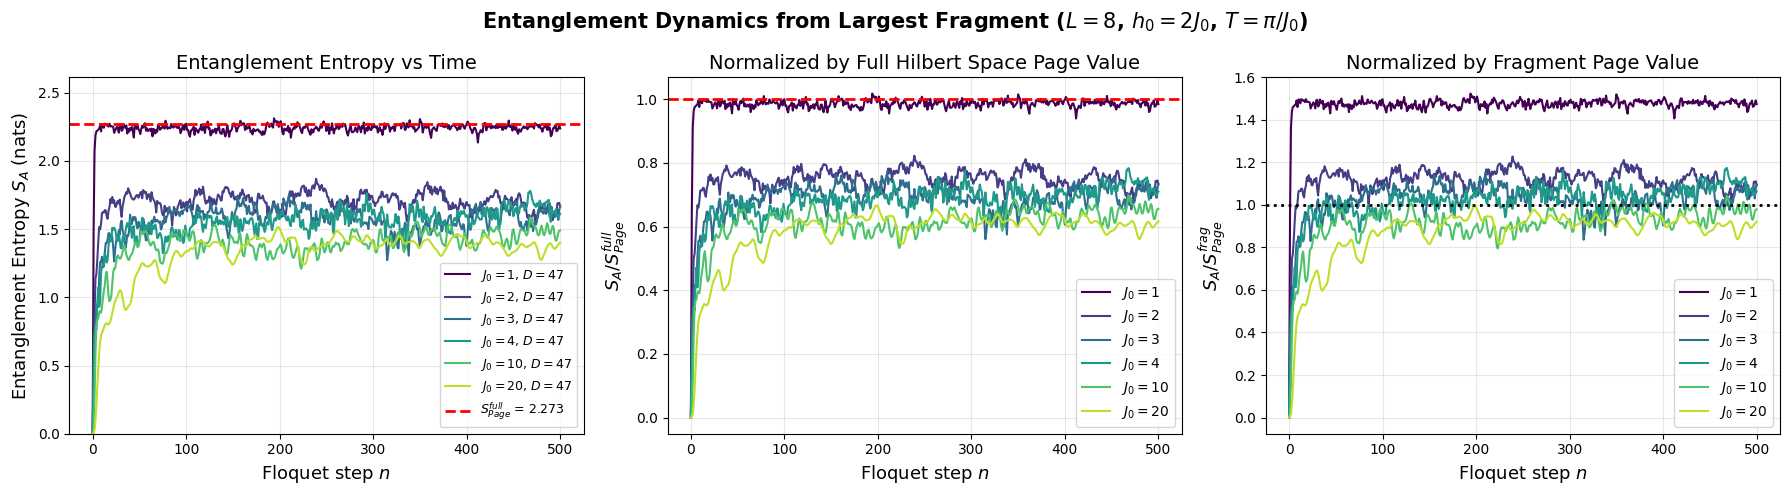


SUMMARY TABLE
J_0      h_0      T            D_frag     S_page^frag  S_final      S/S_Page^full  S/S_Page^frag 
--------------------------------------------------------------------------------
1        2.0      3.141593     47         1.5180       2.2385       0.9850         1.4746        
2        4.0      1.570796     47         1.5229       1.6644       0.7324         1.0929        
3        6.0      1.047198     47         1.5222       1.6674       0.7337         1.0954        
4        8.0      0.785398     47         1.5162       1.6129       0.7097         1.0637        
10       20.0     0.314159     47         1.5216       1.4902       0.6557         0.9793        
20       40.0     0.157080     47         1.5208       1.4014       0.6167         0.9215        

✓ Comparison complete!


In [ ]:
def plot_comparison_J0_values(results_list, L):
    """
    Plot entanglement dynamics for different J_0 values.

    Parameters:
    -----------
    results_list : list of dict
        Results from run_fragment_analysis_for_J0 for each J_0
    L : int
        Chain length
    """
    # Color map for different J_0 values
    colors = plt.cm.viridis(np.linspace(0, 0.9, len(results_list)))

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # Get the full Page value (same for all J_0)
    S_page_full = results_list[0]['S_page_full']

    # ========== Left plot: Entropy S(n) ==========
    ax1 = axes[0]
    for i, res in enumerate(results_list):
        label = f"$J_0 = {res['J_0']}$, $D = {res['D_largest']}$"
        ax1.plot(res['steps'], res['S_avg'], color=colors[i], linewidth=1.5, label=label)

    ax1.axhline(S_page_full, color='red', linestyle='--', linewidth=2,
                label=f'$S_{{Page}}^{{full}}$ = {S_page_full:.3f}')

    ax1.set_xlabel('Floquet step $n$', fontsize=13)
    ax1.set_ylabel('Entanglement Entropy $S_A$ (nats)', fontsize=13)
    ax1.set_title('Entanglement Entropy vs Time', fontsize=14)
    ax1.legend(fontsize=9, loc='lower right')
    ax1.grid(True, alpha=0.3)
    ax1.set_ylim(0, S_page_full * 1.15)

    # ========== Middle plot: Ratio to full Page value ==========
    ax2 = axes[1]
    for i, res in enumerate(results_list):
        label = f"$J_0 = {res['J_0']}$"
        ax2.plot(res['steps'], res['S_avg'] / S_page_full, color=colors[i],
                 linewidth=1.5, label=label)

    ax2.axhline(1.0, color='red', linestyle='--', linewidth=2)

    ax2.set_xlabel('Floquet step $n$', fontsize=13)
    ax2.set_ylabel(r'$S_A / S_{Page}^{full}$', fontsize=13)
    ax2.set_title('Normalized by Full Hilbert Space Page Value', fontsize=14)
    ax2.legend(fontsize=10, loc='lower right')
    ax2.grid(True, alpha=0.3)

    # ========== Right plot: Ratio to fragment Page value ==========
    ax3 = axes[2]
    for i, res in enumerate(results_list):
        label = f"$J_0 = {res['J_0']}$"
        ax3.plot(res['steps'], res['S_avg'] / res['S_page_frag'], color=colors[i],
                 linewidth=1.5, label=label)

    ax3.axhline(1.0, color='black', linestyle=':', linewidth=2)

    ax3.set_xlabel('Floquet step $n$', fontsize=13)
    ax3.set_ylabel(r'$S_A / S_{Page}^{frag}$', fontsize=13)
    ax3.set_title('Normalized by Fragment Page Value', fontsize=14)
    ax3.legend(fontsize=10, loc='lower right')
    ax3.grid(True, alpha=0.3)

    fig.suptitle(f'Entanglement Dynamics from Largest Fragment ($L = {L}$, $h_0 = 2J_0$, $T = \\pi/J_0$)',
                 fontsize=15, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # Print summary table
    print("\n" + "="*80)
    print("SUMMARY TABLE")
    print("="*80)
    print(f"{'J_0':<8} {'h_0':<8} {'T':<12} {'D_frag':<10} {'S_page^frag':<12} {'S_final':<12} {'S/S_Page^full':<14} {'S/S_Page^frag':<14}")
    print("-"*80)
    for res in results_list:
        print(f"{res['J_0']:<8} {res['h_0']:<8} {res['T']:<12.6f} {res['D_largest']:<10} "
              f"{res['S_page_frag']:<12.4f} {res['S_avg'][-1]:<12.4f} "
              f"{res['S_avg'][-1]/S_page_full:<14.4f} {res['S_avg'][-1]/res['S_page_frag']:<14.4f}")
    print("="*80)



# Plot comparison
print("\n" + "="*70)
print("Plotting comparison...")
print("="*70)

plot_comparison_J0_values(results_list, L_compare)

print("\n✓ Comparison complete!")

## EE vs fragments

### Results code

In [ ]:
# ============================================================
# PART 12: ENTANGLEMENT DYNAMICS FOR Five LARGEST FRAGMENTS
# ============================================================

print("="*70)
print("PART 12: Entanglement Dynamics for Four Largest Fragments")
print("="*70)

# Parameters (using fragmentation condition T = π/J_0)
L = 10
J_0 = 10.0
h_0 = 20.0
g = 1.0
T_period = np.pi / J_0

print(f"\nParameters: L={L}, J_0={J_0}, h_0={h_0}, g={g}")
print(f"Fragmentation period: T = π/J_0 = {T_period:.6f}")

# Build Floquet system
ising = FloquetIsingChain(L=L, J_0=J_0, h_0=h_0, g=g, TP=T_period, hbar=1.0)
ising.build_hamiltonians()
U_floquet = build_floquet_operator(ising)

# Build O operator and find fragments
O_diag = build_O_operator(L, J_0)
adjacency, num_edges = build_connectivity_graph(L, O_diag)
components = find_connected_components(adjacency)

# Sort by size and get four largest
components_sorted = sorted(components, key=len, reverse=True)
five_largest_fragments = components_sorted[:5]

print(f"\nFour largest fragments:")
for i, frag in enumerate(four_largest_fragments):
    print(f"  Fragment {i+1}: D = {len(frag)} states")

# Simulation parameters
n_periods = 500
n_samples = 20
A_indices = list(range(L // 2))
S_page_full = compute_page_value(L)

# Storage for results
fragment_results = []

for i, fragment in enumerate(four_largest_fragments):
    D_frag = len(fragment)
    print(f"\n--- Fragment {i+1} (D = {D_frag}) ---")

    steps = np.arange(n_periods + 1)
    S_all = np.zeros((n_samples, n_periods + 1))

    for r in range(n_samples):
        psi, state_idx = build_random_basis_state_in_fragment(fragment, L)
        S_all[r, 0] = bipartite_entropy(psi, L, A_indices)

        psi_t = psi.copy()
        for n in range(1, n_periods + 1):
            psi_t = U_floquet @ psi_t
            S_all[r, n] = bipartite_entropy(psi_t, L, A_indices)

        if (r + 1) % 5 == 0:
            print(f"  Completed sample {r+1}/{n_samples}")

    S_avg = np.mean(S_all, axis=0)
    S_std = np.std(S_all, axis=0, ddof=1)

    fragment_results.append({
        'fragment_id': i + 1,
        'D': D_frag,
        'steps': steps,
        'S_avg': S_avg,
        'S_std': S_std
    })

    print(f"  S(n=0) = {S_avg[0]:.6f}, S(n={n_periods}) = {S_avg[-1]:.4f} ± {S_std[-1]:.4f}")

print("\n" + "="*70)
print("✓ Part 12 Complete: EE dynamics computed for five largest fragments!")
print("="*70)

PART 12: Entanglement Dynamics for Four Largest Fragments

Parameters: L=10, J_0=10.0, h_0=20.0, g=1.0
Fragmentation period: T = π/J_0 = 0.314159
System Parameters (PERIODIC BC):
  Chain length L = 10
  J_0 = 10.0
  h_0 = 20.0
  g = 1.0
  Period T = 0.314159
  Hilbert space dimension = 1024
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!

Hamiltonians constructed successfully (PERIODIC BC)!
  H+ shape: (1024, 1024)
  H- shape: (1024, 1024)
  Number of ZZ bonds: 10 (including wrap-around)
Floquet operator constructed:
  Shape: (1024, 1024)
  Unitarity check: ||U†U - I|| = 6.04e-13

Four largest fragments:
  Fragment 1: D = 123 states
  Fragment 2: D = 21 states
  Fragment 3: D = 21 states
  Fragment 4: D = 21 states
  Fragment 5: D = 21 states

--- Fragment 1 (D = 123) ---
  Completed sample 5/20
  Completed sample 10/20
  Completed sample 15/20
  Completed sample 20/20
  S(n=0) = 0.000000, S(n=500) = 1.9265 ± 0.0997

--- Fragment 2 (D

### Plotting code

Computing fragment Page values...
  Fragment 1 (D=123): S_Page^frag = 1.9918
  Fragment 2 (D=21): S_Page^frag = 0.9092
  Fragment 3 (D=21): S_Page^frag = 0.6045
  Fragment 4 (D=21): S_Page^frag = 1.0929
  Fragment 5 (D=21): S_Page^frag = 0.6047


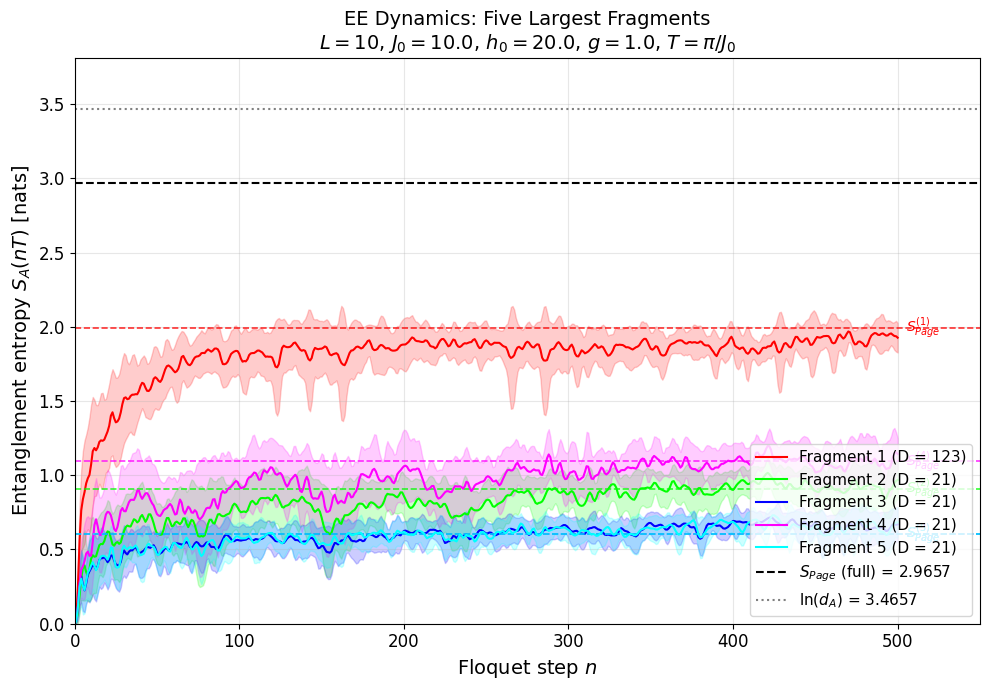


SUMMARY TABLE
Fragment   D        S_Page^frag    S_final            S/S_Page^frag 
--------------------------------------------------------------------------------
1          123      1.9918         1.9265 ± 0.0997   0.9673        
2          21       0.9092         0.9678 ± 0.1267   1.0645        
3          21       0.6045         0.6694 ± 0.1162   1.1075        
4          21       1.0929         1.1438 ± 0.1068   1.0466        
5          21       0.6047         0.6834 ± 0.1010   1.1300        
--------------------------------------------------------------------------------
Full Hilbert space Page value: S_Page = 2.9657


In [ ]:
# ============================================================
# PART 12 (PLOT): ENTANGLEMENT ENTROPY VS. FLOQUET STEPS
# ============================================================

fig, ax = plt.subplots(figsize=(10, 7))

# Colors (colorblind-friendly)
colors = ['#FF0000', '#00FF00', '#0000FF', '#FF00FF', '#00FFFF', '#000000', '#FFFFFF', '#FFFF00', '#FFA500', '#800080']
# Compute fragment Page values via Monte Carlo (fewer samples for speed)
print("Computing fragment Page values...")
fragment_page_values = []
for i, fragment in enumerate(five_largest_fragments):
    S_page_frag, _, _ = compute_fragment_page_value_MC(
        fragment, L, n_samples=100000, verbose=False
    )
    fragment_page_values.append(S_page_frag)
    print(f"  Fragment {i+1} (D={len(fragment)}): S_Page^frag = {S_page_frag:.4f}")

# Plot EE dynamics for each fragment
for i, res in enumerate(fragment_results):
    steps = res['steps']
    S_avg = res['S_avg']
    S_std = res['S_std']
    D = res['D']

    # EE dynamics
    ax.plot(steps, S_avg, color=colors[i], linewidth=1.5,
            label=f'Fragment {i+1} (D = {D})')
    ax.fill_between(steps, S_avg - S_std, S_avg + S_std,
                    color=colors[i], alpha=0.2)

    # Fragment Page value (horizontal dashed line, same color)
    ax.axhline(y=fragment_page_values[i], color=colors[i], linestyle='--',
               linewidth=1.2, alpha=0.8)

# Reference lines
ax.axhline(y=S_page_full, color='black', linestyle='--', linewidth=1.5,
           label=f'$S_{{Page}}$ (full) = {S_page_full:.4f}')
S_max = np.log(2**(L//2))
ax.axhline(y=S_max, color='gray', linestyle=':', linewidth=1.5,
           label=f'$\\ln(d_A)$ = {S_max:.4f}')

# Add text labels for fragment Page values on right side
for i, S_pf in enumerate(fragment_page_values):
    ax.text(n_periods + 5, S_pf, f'$S_{{Page}}^{{({i+1})}}$',
            color=colors[i], fontsize=10, va='center')

ax.set_xlabel('Floquet step $n$', fontsize=14)
ax.set_ylabel('Entanglement entropy $S_A(nT)$ [nats]', fontsize=14)
ax.set_title(f'EE Dynamics: Five Largest Fragments\n'
             f'$L={L}$, $J_0={J_0}$, $h_0={h_0}$, $g={g}$, $T=\\pi/J_0$', fontsize=14)
ax.legend(loc='lower right', fontsize=11)
ax.set_xlim([0, n_periods + 50])
ax.set_ylim([0, S_max * 1.1])
ax.grid(True, alpha=0.3)
ax.tick_params(labelsize=12)

plt.tight_layout()
plt.show()

# Summary table with fragment Page values
print("\n" + "="*80)
print("SUMMARY TABLE")
print("="*80)
print(f"{'Fragment':<10} {'D':<8} {'S_Page^frag':<14} {'S_final':<18} {'S/S_Page^frag':<14}")
print("-"*80)
for i, res in enumerate(fragment_results):
    S_final = res['S_avg'][-1]
    S_std = res['S_std'][-1]
    S_pf = fragment_page_values[i]
    ratio = S_final / S_pf
    print(f"{res['fragment_id']:<10} {res['D']:<8} {S_pf:<14.4f} {S_final:.4f} ± {S_std:.4f}   {ratio:<14.4f}")
print("-"*80)
print(f"Full Hilbert space Page value: S_Page = {S_page_full:.4f}")
print("="*80)